In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

In [2]:
COMPANY_IDENTIFIER_LIST = [
    'RA',
    'HPCC',
    'SFVPC',
    'EMA',
    'EMF',
    'EMM',
    'EMT',
    'GRG',
    'ST',
    'EL'
]

In [3]:
mba = msrp_band_analyzer.MSRPBand()

In [4]:
mba.update_company_data(COMPANY_IDENTIFIER_LIST)


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2021-10-01
Latest download summary: 2022-03-21

Verifying download summaries for license C12-0000359-LIC...
Earliest download summary: 2022-01-03
Latest download summary: 2022-03-21

Verifying download summaries for license C10-0000169-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C10-0000408-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C9-0000323-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C9-0000370-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C10-0000005-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C10-0000064-LIC.

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:321: SettingWithCopyWarning

### Combining same product categories with different measurements ### 	


C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Breaking down product names into different brands ### 	


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Available combined product category name in costs dataframe ### 	
['edible' 'flower' 'vape cartridge' 'pre-roll leaf' 'pre-roll flower'
 'extract' 'other concentrate' 'pre-roll infused' 'capsule' 'topical'
 'tincture' 'leaf' 'clone - cutting' 'shake' 'kief' 'seeds'
 'immature plant' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['vape cartridge' 'other concentrate' 'flower' 'edible' 'pre-roll leaf'
 'pre-roll flower' 'extract' 'pre-roll infused' 'tincture' 'capsule'
 'topical' 'seeds' 'clone - cutting' 'kief' 'shake' 'immature plant'
 'infused butter/oil']


In [5]:
mba.company_costs_df.product_category_name.value_counts()

Flower (packaged eighth - each)        17665
Edible (weight - each)                 16130
Vape Cartridge (volume - each)         15953
Vape Cartridge (weight - each)         12417
Extract (weight - each)                10564
Pre-Roll Flower                         8945
Pre-Roll Infused                        6197
Flower                                  4725
Other Concentrate (weight - each)       4670
Edible (volume - each)                  2226
Tincture (volume - each)                2012
Flower (packaged gram - each)           1633
Flower (packaged half ounce - each)     1401
Pre-Roll Leaf                           1386
Flower (packaged quarter - each)        1150
Flower (packaged ounce - each)           950
Topical (weight - each)                  700
Capsule (weight - each)                  605
Topical (volume - each)                  529
Flower (packaged - each)                 473
Shake (Packaged Half Ounce - each)       181
Shake (Packaged Eighth - each)           175
Other Conc

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.311778290993072 %


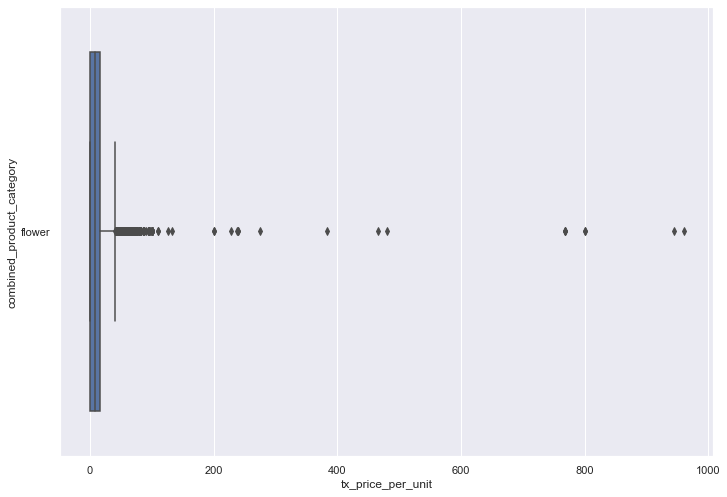

### Checking histogram distribution of MSRP for given combined_product_category ### 	
Total number of transactions for flower in combined_product_category : 26240


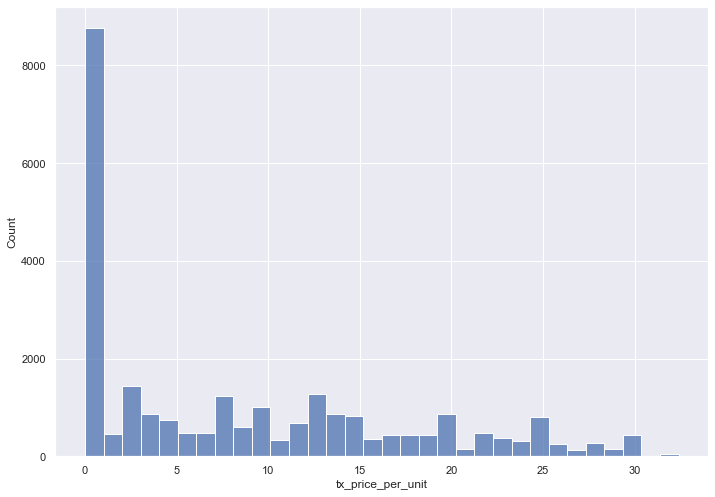

### Outputting summary table ### 	
count    25954.00
mean         8.74
std          8.89
min          0.00
25%          0.01
50%          6.75
75%         15.00
max         32.40
Name: flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                count   mean   std  min   25%    50%    75%    max
date_in_month                                                     
2020-01         600.0   2.98  2.30  0.0  1.08   2.86   4.24  11.00
2020-02         613.0   2.91  2.46  0.0  0.08   2.86   4.14  17.14
2020-03         788.0   4.14  4.84  0.0  1.00   2.86   4.98  32.00
2020-04         722.0   5.43  6.22  0.0  1.71   3.21   7.14  30.00
2020-05         947.0   5.46  6.60  0.0  0.45   2.83   7.50  32.00
2020-06         854.0   6.15  7.29  0.0  0.29   2.86  10.89  30.00
2020-07         920.0   7.51  7.78  0.0  0.88   4.29  13.00  31.25
2020-08         718.0   8.05  7.99  0.0  0.29   5.80  13.50  30.00
2020-09         778.0   7.77  8.18  0.0  0.27   5.10  13.

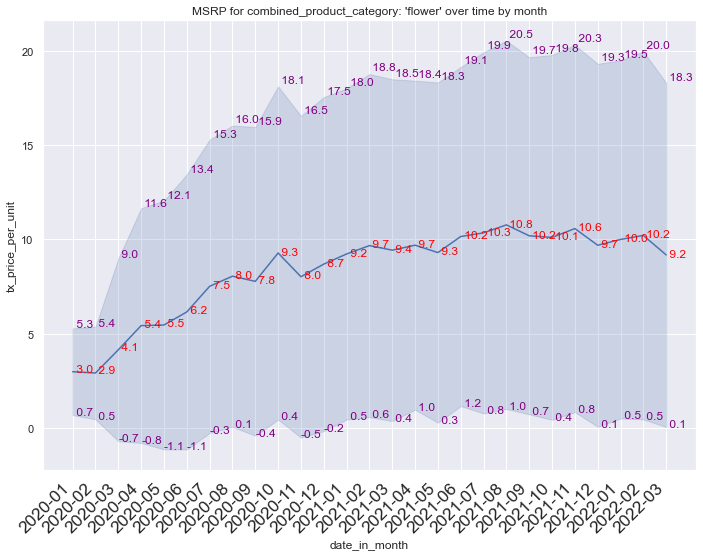

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         0.68                   5.28
2020-02                         0.45                   5.37
2020-03                        -0.70                   8.98
2020-04                        -0.79                  11.65
2020-05                        -1.14                  12.06
2020-06                        -1.14                  13.44
2020-07                        -0.27                  15.29
2020-08                         0.06                  16.04
2020-09                        -0.41                  15.95
2020-10                         0.45                  18.11
2020-11                        -0.51                  16.55
2020-12                        -0.17                  17.55
2021-01                         0.45                  18.01
2021-02                         0.57                  18.77
2021-03                         0.37    

In [6]:
mba.run_analysis('combined_product_category', 'flower', 'C')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.10975080316054527 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.24181644525484 %


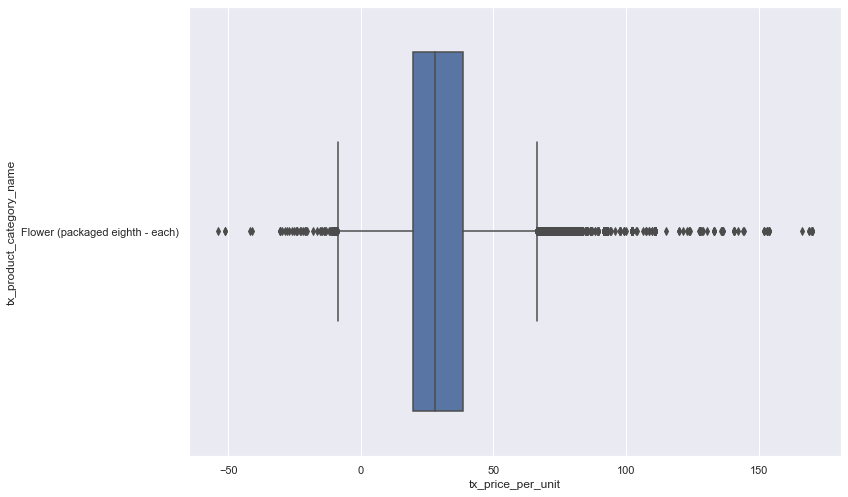

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Flower (packaged eighth - each) in tx_product_category_name : 545033


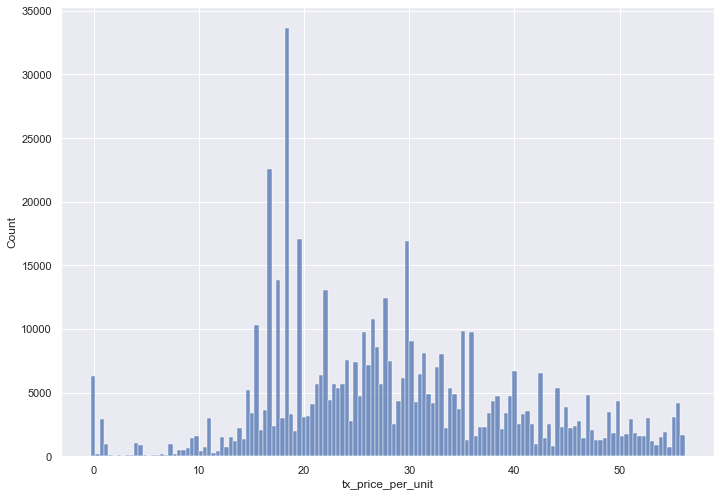

### Outputting summary table ### 	
count    545033.00
mean         28.50
std          11.78
min          -0.24
25%          19.13
50%          27.32
75%          35.94
max          56.17
Name: Flower (packaged eighth - each), dtype: float64
### Outputting summary table by time broken down in months ### 	
                 count   mean    std   min    25%    50%    75%    max
date_in_month                                                         
2020-03         2240.0  29.58   6.32  0.00  27.10  29.66  31.07  54.52
2020-04         5688.0  29.75   7.53  0.00  26.07  28.80  32.97  55.89
2020-05        10918.0  28.95  10.15  0.00  21.52  28.75  33.10  56.12
2020-06        10295.0  31.67   9.90  0.00  26.69  30.58  38.26  56.17
2020-07        15613.0  31.51  10.99  0.00  22.24  30.11  39.89  56.12
2020-08        18838.0  30.23  10.63  0.00  20.55  29.66  38.26  55.90
2020-09        16751.0  29.66  10.89  0.00  19.66  28.13  37.52  55.88
2020-10        18011.0  29.79  11.05 -0.01  18.62  28.9

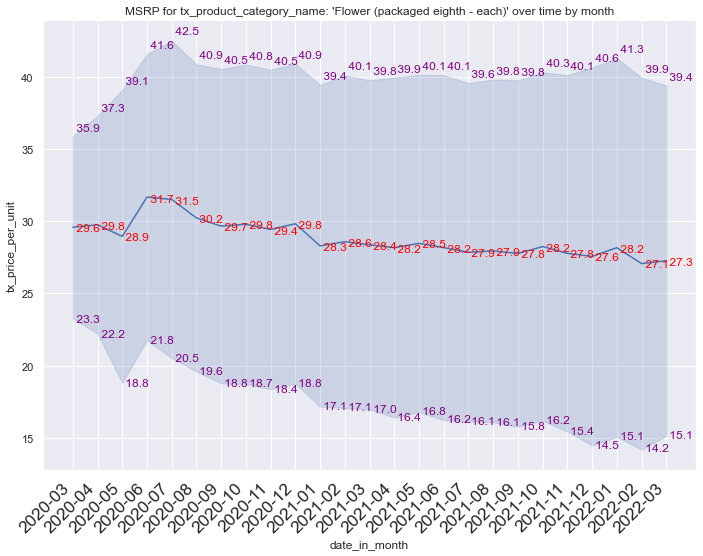

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-03                        23.26                  35.90
2020-04                        22.22                  37.28
2020-05                        18.80                  39.10
2020-06                        21.77                  41.57
2020-07                        20.52                  42.50
2020-08                        19.60                  40.86
2020-09                        18.77                  40.55
2020-10                        18.74                  40.84
2020-11                        18.37                  40.49
2020-12                        18.75                  40.89
2021-01                        17.15                  39.43
2021-02                        17.06                  40.10
2021-03                        16.98                  39.76
2021-04                        16.40                  39.94
2021-05                        16.80    

In [7]:
mba.run_analysis('tx_product_category_name', 'Flower (packaged eighth - each)', 'S')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.7038678894115258 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.053940644986634 %


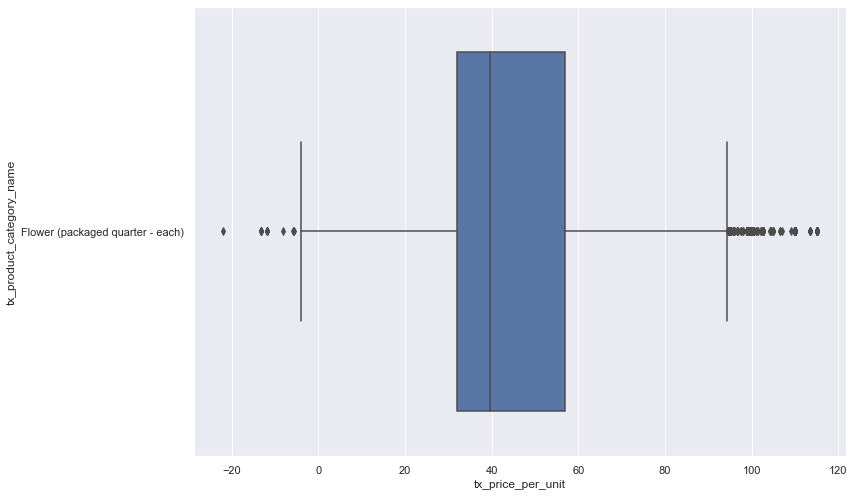

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Flower (packaged quarter - each) in tx_product_category_name : 27554


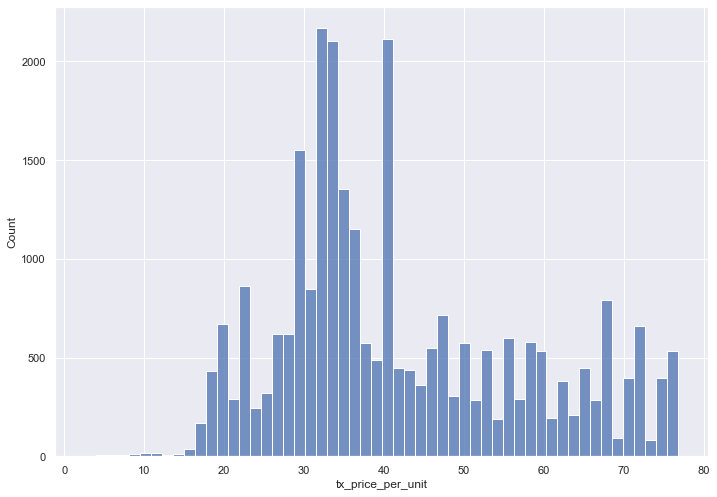

### Outputting summary table ### 	
count    27554.00
mean        42.06
std         15.49
min          2.58
25%         31.72
50%         37.62
75%         52.53
max         76.81
Name: Flower (packaged quarter - each), dtype: float64
### Outputting summary table by time broken down in months ### 	
                count   mean    std    min    25%    50%    75%    max
date_in_month                                                         
2020-03           7.0  46.00  18.23  31.50  31.50  31.50  63.00  70.00
2020-04         202.0  32.42   9.88  21.49  27.63  30.70  31.50  70.00
2020-05         112.0  36.97  14.69  20.32  23.91  31.48  52.50  70.00
2020-06         205.0  38.05  12.56  19.13  30.50  35.01  40.00  74.25
2020-07         674.0  48.87  16.68  18.63  34.94  40.09  65.00  74.25
2020-08        1390.0  43.24  17.11   7.42  29.43  35.48  63.95  74.25
2020-09         770.0  48.72  18.37   7.10  31.22  48.48  66.82  75.74
2020-10         815.0  42.69  15.48  22.47  30.16  35.00  58.6

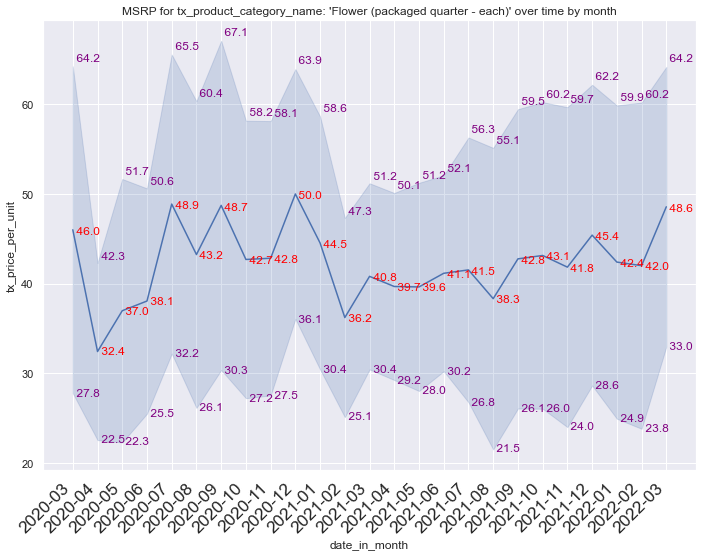

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-03                        27.77                  64.23
2020-04                        22.54                  42.30
2020-05                        22.28                  51.66
2020-06                        25.49                  50.61
2020-07                        32.19                  65.55
2020-08                        26.13                  60.35
2020-09                        30.35                  67.09
2020-10                        27.21                  58.17
2020-11                        27.53                  58.13
2020-12                        36.07                  63.93
2021-01                        30.42                  58.64
2021-02                        25.10                  47.32
2021-03                        30.42                  51.18
2021-04                        29.24                  50.10
2021-05                        28.01    

In [8]:
mba.run_analysis('tx_product_category_name', 'Flower (packaged quarter - each)', 'S')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0433852027535142 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.603979869265923 %


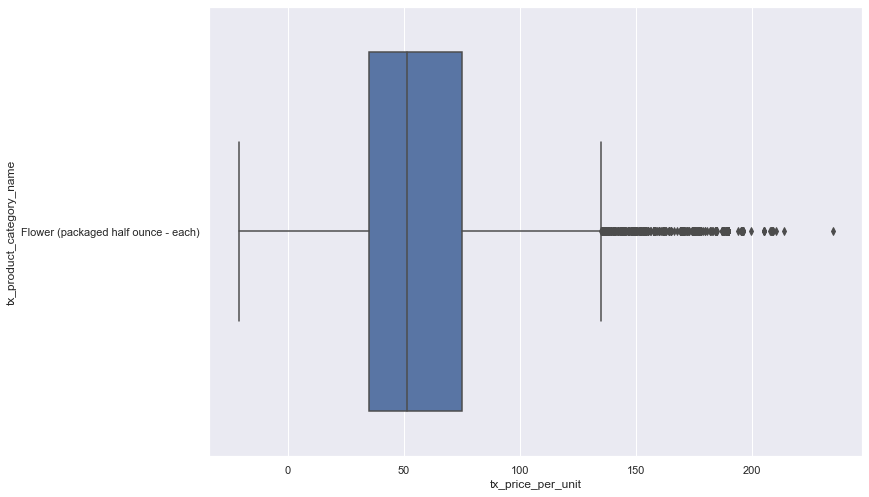

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Flower (packaged half ounce - each) in tx_product_category_name : 31930


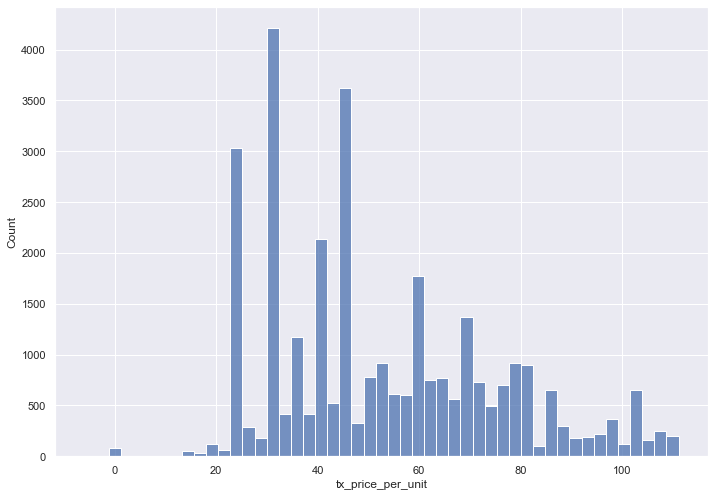

### Outputting summary table ### 	
count    31930.00
mean        52.67
std         22.54
min         -5.88
25%         30.12
50%         45.00
75%         68.23
max        111.11
Name: Flower (packaged half ounce - each), dtype: float64
### Outputting summary table by time broken down in months ### 	


posx and posy should be finite values


                count   mean    std    min    25%    50%     75%     max
date_in_month                                                           
2020-03          52.0  77.35  14.05   0.00  72.53  81.11   87.82   87.82
2020-04           1.0  79.04    NaN  79.04  79.04  79.04   79.04   79.04
2020-05          65.0  42.14  24.20  23.18  28.97  28.97   68.18   88.48
2020-06          55.0  75.71  13.76  26.65  68.20  74.42   81.11  107.66
2020-07         181.0  53.40  22.56  21.73  28.97  61.24   68.05  107.66
2020-08         180.0  79.26  18.29   0.02  66.83  79.04   91.88  108.51
2020-09         374.0  82.43  14.84   0.01  70.34  79.04   97.66  108.51
2020-10         293.0  72.55  10.93  38.25  68.05  70.34   78.16  108.51
2020-11         267.0  76.69  18.42   0.00  68.69  78.16   87.85  109.95
2020-12         223.0  80.08  20.74   0.01  64.15  78.16  102.86  107.59
2021-01         272.0  79.20  18.74   0.01  70.34  79.35   88.17  110.87
2021-02         202.0  81.51  20.68   0.01  68.17  

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


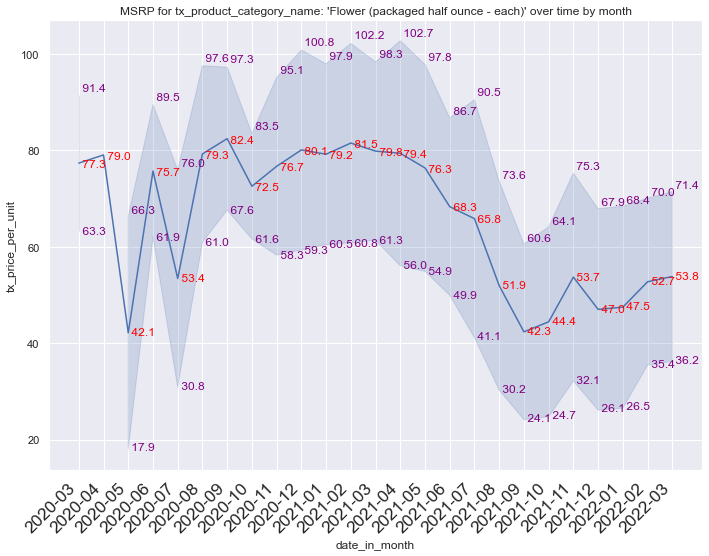

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-03                        63.30                  91.40
2020-04                          NaN                    NaN
2020-05                        17.94                  66.34
2020-06                        61.95                  89.47
2020-07                        30.84                  75.96
2020-08                        60.97                  97.55
2020-09                        67.59                  97.27
2020-10                        61.62                  83.48
2020-11                        58.27                  95.11
2020-12                        59.34                 100.82
2021-01                        60.46                  97.94
2021-02                        60.83                 102.19
2021-03                        61.34                  98.34
2021-04                        56.04                 102.74
2021-05                        54.88    

In [9]:
mba.run_analysis('tx_product_category_name', 'Flower (packaged half ounce - each)', 'S')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.482245131729668 %


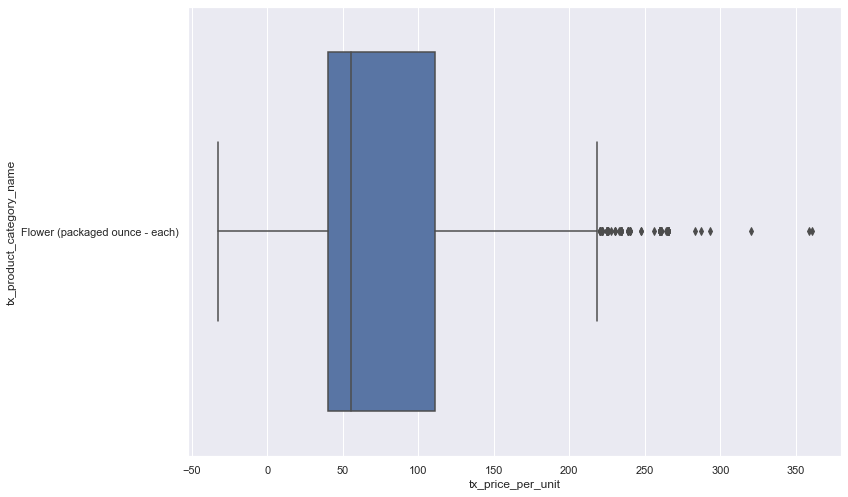

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Flower (packaged ounce - each) in tx_product_category_name : 16852


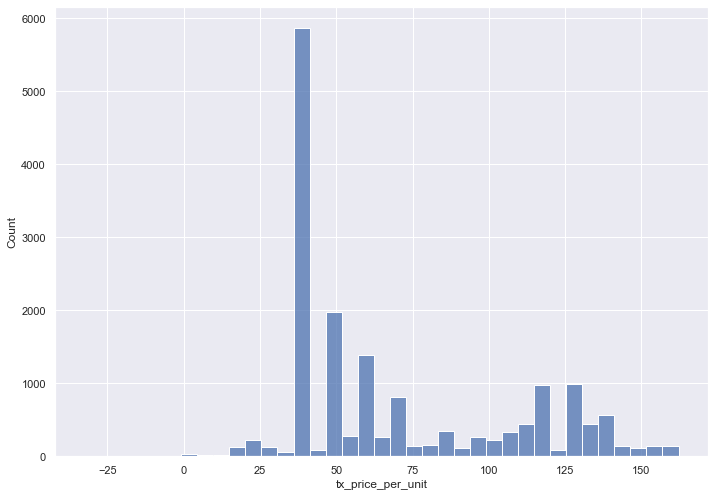

### Outputting summary table ### 	
count    16852.00
mean        70.30
std         37.10
min        -32.37
25%         40.00
50%         50.00
75%        107.59
max        162.18
Name: Flower (packaged ounce - each), dtype: float64
### Outputting summary table by time broken down in months ### 	
                count    mean    std     min     25%     50%     75%     max
date_in_month                                                               
2020-04           2.0  158.24   4.33  155.17  156.70  158.24  159.77  161.30
2020-07         165.0   87.52  44.61   21.73   28.97  111.31  125.38  152.64
2020-08         149.0   99.60  33.55   48.28   61.15  117.51  130.57  139.31
2020-09          81.0  113.88  31.81   51.50  111.45  125.38  139.31  158.70
2020-10         165.0  107.06  43.50    8.41  111.45  125.38  130.57  158.70
2020-11         126.0  129.94  17.03    8.90  125.38  125.38  139.31  158.70
2020-12         116.0  120.32  30.71    0.00  118.39  125.38  139.31  158.70
2021-01   

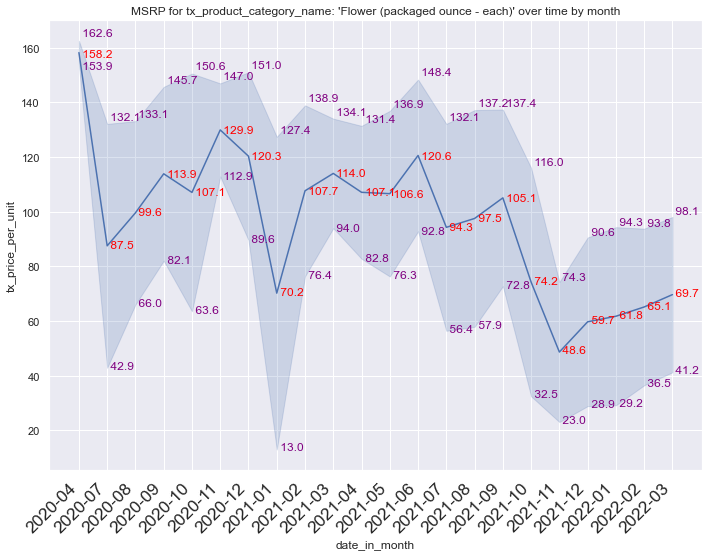

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-04                       153.91                 162.57
2020-07                        42.91                 132.13
2020-08                        66.05                 133.15
2020-09                        82.07                 145.69
2020-10                        63.56                 150.56
2020-11                       112.91                 146.97
2020-12                        89.61                 151.03
2021-01                        13.00                 127.40
2021-02                        76.39                 138.93
2021-03                        93.98                 134.06
2021-04                        82.79                 131.43
2021-05                        76.31                 136.91
2021-06                        92.84                 148.36
2021-07                        56.42                 132.14
2021-08                        57.90    

In [10]:
mba.run_analysis('tx_product_category_name', 'Flower (packaged ounce - each)', 'S')

# Number validation 

In [6]:
mba.company_sales_df

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
3132981,C10-0000064-LIC,0005126708,inactive,Consumer,2020-01-01 10:06:01+00:00,2020-01,1,32.48,inactive,1579580,1A406030000390D000005305,MAAD Trainwreck Hybrid .5G Cart 7017-A,Vape Cartridge (volume - each),Each,1.0,32.48,32.480000,2020-01,223191,0.5,.5G,NaN,NaN,64.960000,0.5,vape cartridge,True,MAAD Trainwreck Hybrid .5G Cart 7017,MAAD Trainwreck Hybrid .5G Cart 7017 (Vape Car...
3077979,C10-0000005-LIC,0007538317,active,Consumer,2020-01-22 16:09:54+00:00,2020-01,2,70.04,active,1875261,1A4060300009F02000026145,JETTY - Pax Pod Alien OG - 500mg,Other Concentrate (weight - each),Each,1.0,35.02,35.020000,2020-01,NaN,0.5,500mg,NaN,NaN,70.040000,0.5,other concentrate,True,JETTY,JETTY (Other Concentrate (weight - each))
3077978,C10-0000064-LIC,0007541945,inactive,Consumer,2020-01-22 16:10:17+00:00,2020-01,2,42.20,inactive,2051213,1A4060300003FB1000025621,Littles 3.5g Flower - Sativa,Flower,Grams,3.5,16.61,4.745714,2020-01,NaN,NaN,3.5g,NaN,NaN,4.745714,1.0,flower,True,Littles 3.5g Flower,Littles 3.5g Flower (Flower)
3077977,C10-0000064-LIC,0007541945,inactive,Consumer,2020-01-22 16:10:17+00:00,2020-01,2,42.20,inactive,2051783,1A40603000038C5000007638,Wedding Cake 1/8,Flower,Grams,3.5,25.59,7.311429,2020-01,NaN,NaN,NaN,NaN,NaN,7.311429,1.0,flower,False,Wedding Cake 1/8,Wedding Cake 1/8
3077974,C10-0000005-LIC,0007542352,active,Consumer,2020-01-22 16:11:39+00:00,2020-01,2,30.42,active,2062265,1A4060300006E2E000010448,KE - THC Hybrid Watermelon 100mg - 43g,Edible (weight - each),Each,1.0,15.67,15.670000,2020-01,NaN,0.1,100mg,NaN,NaN,156.700000,0.1,edible,True,KE,KE (Edible (weight - each))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,C10-0000064-LIC,0170043416,active,Consumer,2022-03-07 16:54:47+00:00,2022-03,2,54.69,active,22724021,1A406030003BD6D000019194,Lift Tickets: 1.5g Infused Pre Roll: Face Off ...,Pre-Roll Infused,Each,1.0,18.56,18.560000,2022-03,NaN,1.5,1.5g,NaN,NaN,12.373333,1.5,pre-roll infused,False,Lift Tickets: 1.5g Infused Pre Roll: Face Off ...,Lift Tickets: 1.5g Infused Pre Roll: Face Off ...
67520,C10-0000596-LIC,0170043242,active,Consumer,2022-03-07 16:54:20.010000+00:00,2022-03,2,112.00,active,20371365,1A406030000390D000022910,MAADG Bloom Live Resin 1G Key Lime Pie Hybrid ...,Vape Cartridge (volume - each),Each,1.0,56.00,56.000000,2022-03,43443,1.0,1G,NaN,NaN,56.000000,1.0,vape cartridge,False,MAADG Bloom Live Resin 1G Key Lime Pie Hybrid ...,MAADG Bloom Live Resin 1G Key Lime Pie Hybrid ...
67521,C10-0000596-LIC,0170043242,active,Consumer,2022-03-07 16:54:20.010000+00:00,2022-03,2,112.00,active,20370397,1A406030000390D000022906,Bloom Live Resin 1G White Buffalo Sativa Carts...,Vape Cartridge (weight - each),Each,1.0,56.00,56.000000,2022-03,NaN,1.0,1G,NaN,NaN,56.000000,1.0,vape cartridge,False,Bloom Live Resin 1G White Buffalo Sativa Carts...,Bloom Live Resin 1G White Buffalo Sativa Carts...
67523,C10-0000169-LIC,0170043096,active,Consumer,2022-03-07 16:54:13.750000+00:00,2022-03,3,101.22,active,18981394,1A4060300007211000008229,Flawless Cannabis Co. Purple Ringer 3.5g,Flower (packaged eighth - each),Each,1.0,30.74,30.740000,2022-03,NaN,3.5,3.5g,NaN,NaN,8.782857,3.5,flower,False,Flawless Cannabis Co. Purple Ringer 3.5g,Flawless Cannabis Co. Purple Ringer 3.5g


In [7]:
combined_median_price = mba.company_sales_df[mba.company_sales_df.combined_product_category == 'flower'].adjusted_tx_price_per_unit.median()

eighth_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged eighth - each)'].tx_price_per_unit.median()
quarter_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged quarter - each)'].tx_price_per_unit.median()
half_once_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged half ounce - each)'].tx_price_per_unit.median()
once_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged ounce - each)'].tx_price_per_unit.median()

In [8]:
combined_median_price

7.625714285714286

In [9]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged eighth - each)'].head()

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
2901597,C10-0000169-LIC,0016173963,inactive,Consumer,2020-03-20 16:59:37+00:00,2020-03,6,146.59,inactive,3064214,1A4060300004B03000014524,Savage - Flower - 3.5g - Whoodys,Flower (packaged eighth - each),Each,1.0,21.75,21.75,2020-03,NaN,3.5,3.5g,NaN,NaN,6.214286,3.5,flower,True,Savage,Savage (Flower (packaged eighth - each))
2901601,C10-0000169-LIC,0016173963,inactive,Consumer,2020-03-20 16:59:37+00:00,2020-03,6,146.59,inactive,3282528,1A4060300004B03000015648,Savage - Flower - 3.5g - Sundae Driver,Flower (packaged eighth - each),Each,1.0,21.75,21.75,2020-03,NaN,3.5,3.5g,NaN,NaN,6.214286,3.5,flower,True,Savage,Savage (Flower (packaged eighth - each))
2901678,C10-0000064-LIC,0016188339,inactive,Consumer,2020-03-20 16:54:21+00:00,2020-03,1,54.52,inactive,3113763,1A4060300008D05000000345,White Tahoe Cookies (packaged eighth),Flower (packaged eighth - each),Each,1.0,54.52,54.52,2020-03,NaN,NaN,NaN,NaN,NaN,15.577143,3.5,flower,False,White Tahoe Cookies (packaged eighth),White Tahoe Cookies (packaged eighth)
2901673,C10-0000064-LIC,0016188362,inactive,Consumer,2020-03-20 16:54:47+00:00,2020-03,5,105.52,inactive,3183936,1A4060300004F4E000039406,"ACW-1 : CYP CAN, Big Smooth, 3.5g Adult-Use : ...",Flower (packaged eighth - each),Each,1.0,26.90,26.90,2020-03,06435,3.5,3.5g,NaN,NaN,7.685714,3.5,flower,True,ACW,ACW (Flower (packaged eighth - each))
2901696,C10-0000064-LIC,0016188059,inactive,Consumer,2020-03-20 16:52:42+00:00,2020-03,4,100.01,inactive,3183936,1A4060300004F4E000039406,"ACW-1 : CYP CAN, Big Smooth, 3.5g Adult-Use : ...",Flower (packaged eighth - each),Each,1.0,26.90,26.90,2020-03,06435,3.5,3.5g,NaN,NaN,7.685714,3.5,flower,True,ACW,ACW (Flower (packaged eighth - each))


In [10]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged eighth - each)'].measurement_ratio_vs_gram.describe()


count    582636.0
mean          3.5
std           0.0
min           3.5
25%           3.5
50%           3.5
75%           3.5
max           3.5
Name: measurement_ratio_vs_gram, dtype: float64

In [11]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged quarter - each)'].head()

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
2900513,C10-0000596-LIC,0016345310,active,Consumer,2020-03-20 20:23:48.460000+00:00,2020-03,2,63.01,active,3050235,1A406030000A3CF000000230,Clonbar King Louis 7g Pouch,Flower (packaged quarter - each),Each,1.0,63.0,63.0,2020-03,NaN,7.0,7g,NaN,NaN,9.0,7.0,flower,False,Clonbar King Louis 7g Pouch,Clonbar King Louis 7g Pouch
2894807,C10-0000596-LIC,0016532766,active,Consumer,2020-03-23 13:23:40.090000+00:00,2020-03,5,140.40,active,3050235,1A406030000A3CF000000230,Clonbar King Louis 7g Pouch,Flower (packaged quarter - each),Each,1.0,63.0,63.0,2020-03,NaN,7.0,7g,NaN,NaN,9.0,7.0,flower,False,Clonbar King Louis 7g Pouch,Clonbar King Louis 7g Pouch
2869306,C10-0000596-LIC,0017646031,active,Consumer,2020-03-31 17:22:59.210000+00:00,2020-03,3,105.30,active,3454840,1A406030000A3CF000000306,La Fruta Morada 7g Pouch Unbranded,Flower (packaged quarter - each),Each,1.0,31.5,31.5,2020-03,NaN,7.0,7g,NaN,NaN,4.5,7.0,flower,False,La Fruta Morada 7g Pouch Unbranded,La Fruta Morada 7g Pouch Unbranded
2868654,C10-0000596-LIC,0017680491,active,Consumer,2020-03-31 21:01:37.050000+00:00,2020-03,4,109.80,active,3456105,1A406030000A3CF000000315,Cherry Pie 7g Pouch Unbranded,Flower (packaged quarter - each),Each,1.0,31.5,31.5,2020-03,NaN,7.0,7g,NaN,NaN,4.5,7.0,flower,False,Cherry Pie 7g Pouch Unbranded,Cherry Pie 7g Pouch Unbranded
2868649,C10-0000596-LIC,0017680601,active,Consumer,2020-03-31 21:04:00.890000+00:00,2020-03,4,127.80,active,3456105,1A406030000A3CF000000315,Cherry Pie 7g Pouch Unbranded,Flower (packaged quarter - each),Each,1.0,31.5,31.5,2020-03,NaN,7.0,7g,NaN,NaN,4.5,7.0,flower,False,Cherry Pie 7g Pouch Unbranded,Cherry Pie 7g Pouch Unbranded


In [17]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged quarter - each)'].measurement_ratio_vs_gram.describe()


count    27554.0
mean         7.0
std          0.0
min          7.0
25%          7.0
50%          7.0
75%          7.0
max          7.0
Name: measurement_ratio_vs_gram, dtype: float64

In [12]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged half ounce - each)'].head()

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
2894406,C10-0000596-LIC,0016545666,active,Consumer,2020-03-23 14:41:52.270000+00:00,2020-03,3,145.81,active,3049364,1A406030000A3CF000000226,Clonbar Crescendo 14g,Flower (packaged half ounce - each),Each,1.0,126.00,126.00,2020-03,NaN,14.0,14g,NaN,NaN,9.000000,14.0,flower,False,Clonbar Crescendo 14g,Clonbar Crescendo 14g
2916583,C10-0000005-LIC,0015535702,active,Consumer,2020-03-16 18:29:24+00:00,2020-03,2,162.22,active,3075142,1A4060300005F51000008281,MM-GG5-S-14.18,Flower (packaged half ounce - each),Each,1.0,81.11,81.11,2020-03,NaN,NaN,NaN,NaN,NaN,5.793571,14.0,flower,True,MM,MM (Flower (packaged half ounce - each))
2916606,C10-0000005-LIC,0015535697,active,Consumer,2020-03-16 18:26:15+00:00,2020-03,2,162.22,active,3075142,1A4060300005F51000008281,MM-GG5-S-14.18,Flower (packaged half ounce - each),Each,1.0,81.11,81.11,2020-03,NaN,NaN,NaN,NaN,NaN,5.793571,14.0,flower,True,MM,MM (Flower (packaged half ounce - each))
2917482,C10-0000005-LIC,0015513729,active,Consumer,2020-03-16 16:17:26+00:00,2020-03,4,219.36,active,3075142,1A4060300005F51000008281,MM-GG5-S-14.18,Flower (packaged half ounce - each),Each,1.0,81.11,81.11,2020-03,NaN,NaN,NaN,NaN,NaN,5.793571,14.0,flower,True,MM,MM (Flower (packaged half ounce - each))
2917720,C10-0000005-LIC,0015491945,active,Consumer,2020-03-16 15:48:04+00:00,2020-03,3,177.50,active,3075142,1A4060300005F51000008281,MM-GG5-S-14.18,Flower (packaged half ounce - each),Each,1.0,79.11,79.11,2020-03,NaN,NaN,NaN,NaN,NaN,5.650714,14.0,flower,True,MM,MM (Flower (packaged half ounce - each))


In [19]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged ounce - each)'].tail()

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
46864,C10-0000408-LIC,0169564281,active,Consumer,2022-03-05 15:20:34.570000+00:00,2022-03,1,70.00,active,22143158,1A4060300009EC1000002943,House Party - Flower - TAHOE OG - 28G - BIGS,Flower (packaged ounce - each),Each,1.0,70.00,70.00,2022-03,2.500000,28.0,flower,True,House Party,House Party (Flower (packaged ounce - each))
46980,C10-0000774-LIC,0169559729,active,Consumer,2022-03-05 15:08:32+00:00,2022-03,1,54.67,active,22597704,1A406030003BD6D000010599,SunSmoke: 28g Pre-Ground Flower: Hybrid Blend,Flower (packaged ounce - each),Each,1.0,54.67,54.67,2022-03,1.952500,28.0,flower,True,SunSmoke: 28g Pre,SunSmoke: 28g Pre (Flower (packaged ounce - ea...
47011,C10-0000408-LIC,0169558704,active,Consumer,2022-03-05 15:04:45.073000+00:00,2022-03,1,70.00,active,21343741,1A4060300009EC1000002667,House Party - Alien OG - Flower - 28G,Flower (packaged ounce - each),Each,1.0,70.00,70.00,2022-03,2.500000,28.0,flower,True,House Party,House Party (Flower (packaged ounce - each))
46979,C10-0000169-LIC,0169559800,active,Consumer,2022-03-05 15:08:47.730000+00:00,2022-03,1,115.14,active,21850545,1A4060300003782000020548,Speedy Weedy Vanilla Kush 1oz,Flower (packaged ounce - each),Each,1.0,115.14,115.14,2022-03,4.112143,28.0,flower,False,Speedy Weedy Vanilla Kush 1oz,Speedy Weedy Vanilla Kush 1oz
46973,C10-0000408-LIC,0169560151,active,Consumer,2022-03-05 15:09:31.340000+00:00,2022-03,2,60.58,active,22585023,1A4060300009EC1000003102,House Party - Alien OG - Flower - Littles,Flower (packaged ounce - each),Each,1.0,50.00,50.00,2022-03,1.785714,28.0,flower,True,House Party,House Party (Flower (packaged ounce - each))


In [20]:
eighth_median_price/3.5

7.805714285714286

In [21]:
quarter_median_price/7

5.375

In [22]:
half_once_median_price/14

3.2142857142857144

In [23]:
once_median_price/28

1.7857142857142858

<AxesSubplot:>

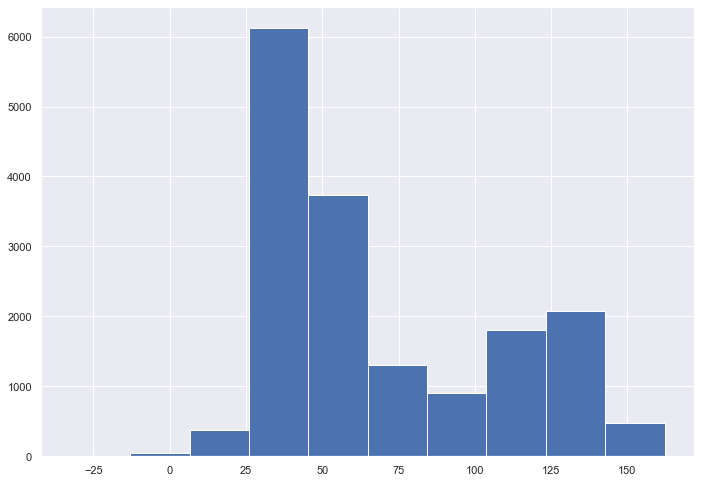

In [24]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged ounce - each)'].tx_price_per_unit.hist()

<AxesSubplot:>

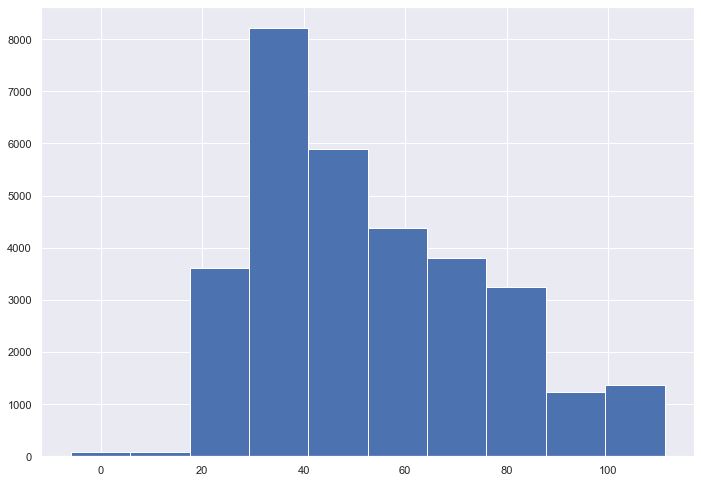

In [25]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged half ounce - each)'].tx_price_per_unit.hist()

In [31]:
mba.company_sales_df[mba.company_sales_df.tx_unit_of_measure == 'Each']

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
3101901,C10-0000064-LIC,0005126708,inactive,Consumer,2020-01-01 10:06:01+00:00,2020-01,1,32.48,inactive,1579580,1A406030000390D000005305,MAAD223191 Trainwreck Hybrid .5G Cart 7017-A,Vape Cartridge (volume - each),Each,1.0,32.48,32.48,2020-01,32.48,1.0,vape cartridge,True,MAAD223191 Trainwreck Hybrid .5G Cart 7017,MAAD223191 Trainwreck Hybrid .5G Cart 7017 (Va...
3046899,C10-0000005-LIC,0007538317,active,Consumer,2020-01-22 16:09:54+00:00,2020-01,2,70.04,active,1875261,1A4060300009F02000026145,JETTY - Pax Pod Alien OG - 500mg,Other Concentrate (weight - each),Each,1.0,35.02,35.02,2020-01,35.02,1.0,other concentrate,True,JETTY,JETTY (Other Concentrate (weight - each))
3046894,C10-0000005-LIC,0007542352,active,Consumer,2020-01-22 16:11:39+00:00,2020-01,2,30.42,active,1784421,1A40603000087FA000000247,Sour Watermelon Indica,Edible (weight - each),Each,1.0,14.75,14.75,2020-01,14.75,1.0,edible,False,Sour Watermelon Indica,Sour Watermelon Indica
3046893,C10-0000005-LIC,0007542352,active,Consumer,2020-01-22 16:11:39+00:00,2020-01,2,30.42,active,2062265,1A4060300006E2E000010448,KE - THC Hybrid Watermelon 100mg - 43g,Edible (weight - each),Each,1.0,15.67,15.67,2020-01,15.67,1.0,edible,True,KE,KE (Edible (weight - each))
3046892,C10-0000005-LIC,0007542355,active,Consumer,2020-01-22 16:11:40+00:00,2020-01,1,16.59,active,1784419,1A40603000087FA000000245,Tropical Twist CBD,Edible (weight - each),Each,1.0,16.59,16.59,2020-01,16.59,1.0,edible,False,Tropical Twist CBD,Tropical Twist CBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46956,C10-0000695-LIC,0169560561,active,Consumer,2022-03-05 15:11:12+00:00,2022-03,1,39.04,active,22677208,1A4060300022B79000264482,"All-in-One Sunshine Dream .5g Vape (S), Hashta...",Vape Cartridge (weight - each),Each,1.0,39.04,39.04,2022-03,39.04,1.0,vape cartridge,True,All,All (Vape Cartridge (weight - each))
46957,C10-0000786-LIC,0169560398,active,Consumer,2022-03-05 15:10:49+00:00,2022-03,1,51.58,active,22743030,1A406030001BDB5000034970,"Sweet Diesel #18 1.0g Vape Cart, Central Coast...",Vape Cartridge (weight - each),Each,1.0,51.58,51.58,2022-03,51.58,1.0,vape cartridge,False,"Sweet Diesel #18 1.0g Vape Cart, Central Coast...","Sweet Diesel #18 1.0g Vape Cart, Central Coast..."
46958,C10-0000408-LIC,0169560480,active,Consumer,2022-03-05 15:10:48.313000+00:00,2022-03,3,89.22,active,18926223,1A4060300003EE8000107499,"Releaf Balm, 50ml Finished Good, 1CBD:3THC",Topical (volume - each),Each,1.0,52.92,52.92,2022-03,52.92,1.0,topical,False,"Releaf Balm, 50ml Finished Good, 1CBD:3THC","Releaf Balm, 50ml Finished Good, 1CBD:3THC"
46952,C10-0000169-LIC,0169560855,active,Patient,2022-03-05 15:11:43.600000+00:00,2022-03,3,91.40,active,21068365,1A4060300003CFC000005063,Nepenthe GMO Shatter,Extract (weight - each),Each,1.0,16.32,16.32,2022-03,16.32,1.0,extract,False,Nepenthe GMO Shatter,Nepenthe GMO Shatter


In [44]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each']

3101901         MAAD223191 Trainwreck Hybrid .5G Cart 7017-A
3046899                     JETTY - Pax Pod Alien OG - 500mg
3046894                               Sour Watermelon Indica
3046893               KE - THC Hybrid Watermelon 100mg - 43g
3046892                                   Tropical Twist CBD
                                 ...                        
46956      All-in-One Sunshine Dream .5g Vape (S), Hashta...
46957      Sweet Diesel #18 1.0g Vape Cart, Central Coast...
46958             Releaf Balm, 50ml Finished Good, 1CBD:3THC
46952                                   Nepenthe GMO Shatter
0          14486 Pacific Stone Preroll 0.5g Sativa Blue D...
Name: tx_product_name, Length: 2431722, dtype: object

In [109]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('([0-9]*[\.]?[0-9]+[\s]?[mM]?[gGlL])', expand = False).dropna().unique()

array(['.5G', '500mg', '100mg', '1g', '1.0g', '0.5g', '0.3g', '.3g',
       '10mg', '0.75g', '1 G', '0.8g', '2.5g', '0.5 G', '0.8G', '.5ml',
       '.5g', '100 MG', '0.5G', '.5 G', '15ml', '0.7g', '.6g', '1017L',
       '100 mg', '0.5 g', '5mg', '50mg', '1 g', '50ml', '1000 MG', '86g',
       '86 g', '300mg', '1L', '30ml', '90mg', '1.5g', '1.2g', '2.5 G',
       '1G', '60 ml', '10 MG', '.6ml', '0.6g', '1.75g', '1ml', '5 MG',
       '5ml', '.75 g', '.75g', '30 Ml', '14mg', '33 L', '120 ml',
       '250 MG', '94g', '1.3g', '3.5g', '2.4g', '0.5 mL', '0.5ml',
       '600mg', '270mg', '.5 g', '60mg', '500 MG', '530mg', '60ml',
       '550mg', '0.185g', '150mg', '25mg', '2.2g', '50g', '7mg', '2 g',
       '30mg', '3004 G', '10 mg', '80mg', '0.8 G', '1.3 G', '.4g',
       '1000mg', '5.96mg', '400mg', '710 L', '250mg', '300 mg', '70mg',
       '60g', '25 L', '9l', '.75ml', '.25g', '20 MG', '0.5mL', '1mL',
       '3g', '5g', '20 mg', '0.05g', '0.3G', '1050mg', '15mg', '0.2g',
       '0.6 g', '1

In [56]:
temp = mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('([0-9]*[\.]?[0-9]+[\s]?[mM]?[gGlL]+)', expand = False)

In [80]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('([0-9]/[0-9]?[\s]?oz|[0-9]*[\.]?[0-9]+[\s]?oz)', expand = False)

3101901    NaN
3046899    NaN
3046894    NaN
3046893    NaN
3046892    NaN
          ... 
46956      NaN
46957      NaN
46958      NaN
46952      NaN
0          NaN
Name: tx_product_name, Length: 2431722, dtype: object

In [124]:
mba.company_sales_df.tx_product_name.str.extract('([0-9][0-9][0-9][0-9][0-9])', expand = False).dropna().unique()

(4634,)

In [132]:
mba.company_sales_df.tx_product_name.str.extract('([0-9][0-9][0-9][0-9][0-9]+)', expand = False)

3101901    223191
3046899       NaN
3046898       NaN
3046897       NaN
3046894       NaN
            ...  
46956         NaN
46957         NaN
46958         NaN
46952         NaN
0           14486
Name: tx_product_name, Length: 2608820, dtype: object

In [135]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('([0-9][0-9][0-9][0-9][0-9] [GL])', expand = False)

3101901    NaN
3046899    NaN
3046894    NaN
3046893    NaN
3046892    NaN
          ... 
46956      NaN
46957      NaN
46958      NaN
46952      NaN
0          NaN
Name: tx_product_name, Length: 2431722, dtype: object

In [116]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_product_name.str.contains('18157 G')].apply(lambda x: x.replace('18157 G', ''))

17974    lass House Farms Preroll 1.0g Sativa Hybrid Cr...
18051    lass House Farms Preroll 1.0g Sativa Hybrid Cr...
18083    lass House Farms Preroll 1.0g Sativa Hybrid Cr...
17725    lass House Farms Preroll 1.0g Sativa Hybrid Cr...
17866    lass House Farms Preroll 1.0g Sativa Hybrid Cr...
21032    lass House Farms Preroll 1.0g Sativa Hybrid Cr...
20175    lass House Farms Preroll 1.0g Sativa Hybrid Cr...
20340    lass House Farms Preroll 1.0g Sativa Hybrid Cr...
5696     lass House Farms Preroll 1.0g Sativa Hybrid Cr...
5236     lass House Farms Preroll 1.0g Sativa Hybrid Cr...
5133     lass House Farms Preroll 1.0g Sativa Hybrid Cr...
8197     lass House Farms Preroll 1.0g Sativa Hybrid Cr...
8247     lass House Farms Preroll 1.0g Sativa Hybrid Cr...
8588     lass House Farms Preroll 1.0g Sativa Hybrid Cr...
8388     lass House Farms Preroll 1.0g Sativa Hybrid Cr...
6987     lass House Farms Preroll 1.0g Sativa Hybrid Cr...
1411     lass House Farms Preroll 1.0g Sativa Hybrid Cr.

In [84]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('([0-9]*[\.]?[0-9]+[\s]?[mM]?[gGlL])', expand = False).isna().sum()

696737

In [72]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('([0-9]/[0-9]?[\s]?oz|[0-9]*[\.]?[0-9]+[\s]?oz)', expand = False).dropna().unique()

array(['1/2oz', '0.5oz', '6.5oz', '16 oz', '4oz', '0.5 oz', '2oz',
       '3.25oz', '6.5 oz', '.11 oz', '.11oz', '1/2 oz', '1/8 oz', '1oz',
       '1 oz', '.13oz', '7oz', '1/8oz', '16oz', '12oz', '1.5oz', '8oz',
       '1/4 oz', '1/4oz', '2.0oz', '1.05oz', '.13 oz', '6 oz', '3oz',
       '.5 oz', '6.7oz', '12 oz', '3.7oz', '8 oz', '3.3oz', '.09oz',
       '48 oz', '22oz', '6oz', '2 oz', '1.9oz'], dtype=object)

In [78]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('([0-9]/[0-9]?[\s]?oz|[0-9]*[\.]?[0-9]+[\s]?oz)', expand = False).isna().sum()

2367863

In [88]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('([hH][aA][lL][fF] [gG][rR][aA][mM]|[gG][rR][aA][mM])', expand = False).dropna().unique()

array(['gram', 'Gram', 'Half Gram', 'HALF GRAM', 'GRAM', 'Half gram'],
      dtype=object)

In [89]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('([hH][aA][lL][fF] [gG][rR][aA][mM]|[gG][rR][aA][mM])', expand = False).isna().sum()

2376931

In [174]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].str.extract('(1/8[\.]?th|8[\.]?th|[eE][iI][gH][hH][tT][hH])', expand = False).dropna().unique()

array(['Eighth', 'eighth', '8th', '1/8th'], dtype=object)

In [87]:
#coverage
((2431722-2367863) + (2431722-2376931) + (2431722-696737))/2431722

0.7622725788556423

In [185]:
non_extract_df = mba.company_sales_df[(mba.company_sales_df.tx_unit_of_measure == 'Each') & ((mba.company_sales_df.measurement_ratio_vs_gram == 1))]

In [181]:
mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_unit_of_measure == 'Each'].shape

(2431722,)

In [186]:
non_extract_df.shape

(1794875, 29)

In [187]:
for i in non_extract_df.tx_product_name.unique():
    print(i)

MAAD Trainwreck Hybrid .5G Cart 7017-A
JETTY - Pax Pod Alien OG - 500mg
Sour Watermelon Indica
KE - THC Hybrid Watermelon 100mg - 43g
Tropical Twist CBD
Preroll - Blackberry Fire 1g
S3819FG-1: Stone Single Preroll, Tangie, 1g Adult-Use : INDIVIDUAL
 3Bros Preroll 1.0g Hybrid Peanut Butter Breath (50ct)
GF Indica 1g Pre-Roll: GMO
 Raw Garden Live Resin 1.0g Hybrid Purple Nova #33 (10ct)
 Raw Garden Cartridge 1.0g Indica Mendo Stomper (10ct)
 Raw Garden Cartridge 0.5g Indica Raspberry Trifle (10ct)
 Emerald Sky Licorice Indica Grape Noir 100mg 10-Pack (10mg ea) (24ct)
CRU 0.3g Disp - Wedding Cake
(SI) ABX Sour Diesel All-In-One Vape Cartridge (.3g)
MAADCBloom-Era2 HiPax-Single Origin-Sativa-Silver Haze 5027-A
CRU 0.3g Disp - Forbidden Fruit
Kiva Terra Bites Single Dark Chocolate Espresso 10mg
CRU 0.75g Cart - Grape Sorbet
Puffy Delivery - Cartridges- 1 G - XJ-13
Gold Coast - PreRoll - 0.8g - Hybrid - Blue Cookies
WYLD - Edible - 100mg - Gummy - Indica - Marionberry
 Raw Garden Cartridge 

 Raw Garden Cartridge 0.5g Indica Skystomper (10ct)
Yummy Bomb - Sour Mango Gummies (66 GM Edible (weight - each)) (#02-YBM-0320) #1707
 Raw Garden Cartridge 1.0g Indica Fuego Banana #16 (10ct)
 Raw Garden Cartridge 1.0g Indica Uncirculated Kush (10ct)
Apple Sour Gummy Belts - FLAV
 Raw Garden Live Resin 1.0g Indica Barry's Got Funk (10ct)
CANN Blood Orange Cardamom Single
GLP - FREE | Hawaiian Haze Live Resin 1g Jar
 Raw Garden Cartridge 1.0g Hybrid Cosmic Bliss (10ct)
 Raw Garden Pax Pod 0.5g Sativa Limeade (10ct)
Holy Smokes - Pre- Roll - 0.8g - Indica - Vanila Frosting
Kerosene Preroll 1.2g
 Raw Garden Cartridge 0.5g Hybrid Highwalker #11 (10ct)
Wedding Crashers 1g
ABX Soft Gels 50mg THC (10 capsules)
R.Y.L.U. - Full Spectrum Sauce - Grammed
 Raw Garden Sauce 1.0g Indica Wubba Cookies (10ct)
 Raw Garden Cartridge 1.0g Indica Lemon Beary Kush (10ct)
The OG Preroll 1.2g
Holy Smokes - Pre- Roll - 0.8g - Hybrid - Gorilla Goo
CBD Roll On
Wedding Cake - Pre Rolls
 Raw Garden Pax Pod 0.5g

Lemon Tart Pucker #1 - Live Sugar - Grammed
CRU-.5g PreRoll-Herijuana
Jetpacks Hi Octane-.5g Infused PreRoll-Big Sky OG
Jetpacks Hi Octane-.5g Infused PreRoll-Firewalker OG
 Raw Garden Cartridge 1.0g Indica Galactic Punch (10ct)
 Raw Garden Cartridge 1.0g Indica Temple of Funk (10ct)
CRU-.5g PreRoll-Pure Kush
 Raw Garden Cartridge 1.0g Indica Sour Punch (10ct)
Enjoyable - Chocolate Cookies 110g
KGB Torpedo Infused Preroll Capstone 1.3g
*Sample Not For Re-Sale* Buddies - Headband X Field Cookies - 1g Dab
Platinum Vape Pumpkin Spice Chocolate Bar(100mg)
CRU-.5g PreRoll-Tahoe OG (6pk)
Grand CRU 40s-0.5g Infused PreRoll-Truffle Butter
OCEANS | Organic Diamonds | Ice Cream | 1G | 1CT
 Raw Garden Live Resin 1.0g Indica Pacific Passion (10ct)
Chocolate Oranges #25 x Sunset Sherb - Live Sugar - Grammed
 Raw Garden Cartridge 0.5g Indica Lime Tea (10ct)
 Raw Garden Cartridge 1.0g Indica Bermuda Triangle (10ct)
Platinum Vape Blue Raspberry Gummy
Sweet Releaf Topicals_Comfort Body Butter(25ml)
Swe

Cartridge - Connected - Half Gram - Lemonatti x Gelato 41
Friendly Farms - Flo White - 1g Cured Carts
Gold Country Gummies_Twisted Grape
 Raw Garden Live Resin 1.0g Indica Ice Cream Cake #7 (10ct)
Humboldt Terp Council Strawberry Lemon Punch Live Resin (1g)
1 Gr Jar - Garlic Cookies
CaliStripe - Live Resin - Dosi Face
Mellows - Brown Butter Sage (1-Piece)
Dose Pod - Calm, GSW Creative Corp
Super Mellows - Strawberries & Cream
STIIIZY - Incredible Hulk CDT - 0.5g
0.36g - Roach, Orange Creamsicle
NFR-HIM Live VC500mg Sat-KRS #147-S196
Kind-Topical-Menthol Rub-Indica-Sample-6.5ml
PB 6PK SATIVA D
N5 - Amplify 15ml - 15ml
Friendly Farms - L' Orange - 1g FSO
Friendly Farms - Lemon Tree - 1g FSO
*Sample Not For Re-Sale* Eel Daydreamer NUG Live Resin, NUG Inc
*Sample Not For Re-Sale* Ginger, Damiana, and Lemon Balm Pack, Aperture Brands LLC
CaliStripe - Live Rosin - Mr Nasty
*Sample Not For Re-Sale* The Collection Pack, Aperture Brands LLC
STIIIZY - Flo Mintz Curated Live Resin Sauce - 1.0g
TH

14.0g Budlet - Mendo Breath
Kings Garden Fire Cookies Flower Prepackaged Gram
LOWELL Live Rosin, Wedding Crashers Hybrid, 1g
MAADG Bloom Live Resin 1G Double Deja Vu Hybrid Cartridge 7064-0720
Releaf Capsule, 30ct Finished Good, 2CBD:4THC:1CBN
Releaf Gummies, Blackberry Elderberry, Finished Good, 2CBD:4THC:1CBN
Pre-roll Fruit Tartare pk
Kings Garden GMO Sugar (1g)
S - Royal Dab GG4 Crumble 1g
1 G Wedding Pie - Cured Resin
Box - Doc's OG Sauce Cart - 1g
Korova Extract - Live Resin Diamond Sauce: Molotov Cocktail - 1g / Case of 20
Dripper Sour Blue LD 1g (S), Hashtag Distribution (Buddies)
Kings Garden Jack Live Shatter (1g) DISPLAY
Kings Garden Gelato Live Shatter (1g) DISPLAY
Kings Garden GMO Live Shatter (1g) DISPLAY
BZL Lemon Mintz (Cured Resin Budder), BZL Manufacturing Corp.
Kings Garden First Class Funk Live Shatter (1g) DISPLAY
Artisan - Rosin Infused Preroll - Dragon Breath
Artisan - Gold - 6 Pack Prerolls (0.5g) - Mint Cream
Artisan - Silver - 6 Pack Prerolls (0.5g) - Do-Si-Dos

Dripper GMO Cookies LD 1g (I), Hashtag Distribution (Buddies)
Dripper Wedding Cake x Watermelon Zkittlez LD 1g (I), Hashtag Distribution (Buddies)
Dripper Oscillator OG LD 1g (I), Hashtag Distribution (Buddies)
Herbarium Zerbert .3G Pre-Roll 5 Pack
Jayden's Juice CBD:THC 15 ML (Balance)
Emerald Sky | Live Resin Gummy | 10pk/10mg - 100mg | Raspberry Passionfruit, EMERALD SKY
Dripper Zookies LD 1g (H), Hashtag Distribution (Buddies)
Cali Coastal Hash Co. - Purple Afghan Kush (1 GM Other Concentrate (weight - each)) (#03-CC-PAKS1021) #
BeMore Blunt Watermelon Sugar (1.2g) Original
NCP Xenomorph 1G Indoor Pre-roll
(SL/FF) - (Red Zlush x Astro Lato) - 1g Cured Sauce
Space Coyote | Hash | Single, 1g | Sativa | Chem Dawg Herb | Magic Melon Hash, Space Coyote
Space Coyote | Hash | 5-Pack, 2.5g | Sativa | Magic Melon Herb | Mothers Milk Hash, Space Coyote
(FF) - (Apple Pancakes) - 1g Cured Resin Cartridge
(FF) - (Zkittlez) - 1g Live Resin Cartridge
Randy Watzon #13 L.S. - Persy Live Rosin - Tie

In [193]:
mba.company_sales_df[mba.company_sales_df.tx_product_name.str.contains("OLO 5mg Focus 12 each")]

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name
3046479,C10-0000064-LIC,0007552121,inactive,Consumer,2020-01-22 17:48:26+00:00,2020-01,2,33.48,inactive,610223,1A4060300004F59000002311,OLO 5mg Focus 12 each,Edible (weight - each),Each,1.0,16.74,16.74,2020-01,16.74,1.0,edible,False,OLO 5mg Focus 12 each,OLO 5mg Focus 12 each,NaN,0.005,5mg,NaN,NaN
2963229,C10-0000064-LIC,0011604726,inactive,Consumer,2020-02-20 19:15:27+00:00,2020-02,1,20.92,inactive,610223,1A4060300004F59000002311,OLO 5mg Focus 12 each,Edible (weight - each),Each,1.0,20.92,20.92,2020-02,20.92,1.0,edible,False,OLO 5mg Focus 12 each,OLO 5mg Focus 12 each,NaN,0.005,5mg,NaN,NaN
2945133,C10-0000064-LIC,0012641479,inactive,Consumer,2020-02-27 11:08:34+00:00,2020-02,7,307.32,inactive,610223,1A4060300004F59000002311,OLO 5mg Focus 12 each,Edible (weight - each),Each,1.0,16.74,16.74,2020-02,16.74,1.0,edible,False,OLO 5mg Focus 12 each,OLO 5mg Focus 12 each,NaN,0.005,5mg,NaN,NaN
2946577,C10-0000064-LIC,0012520022,inactive,Consumer,2020-02-26 16:45:30+00:00,2020-02,5,107.80,inactive,610223,1A4060300004F59000002311,OLO 5mg Focus 12 each,Edible (weight - each),Each,1.0,18.83,18.83,2020-02,18.83,1.0,edible,False,OLO 5mg Focus 12 each,OLO 5mg Focus 12 each,NaN,0.005,5mg,NaN,NaN
2981693,C10-0000064-LIC,0010689034,inactive,Consumer,2020-02-14 14:38:12+00:00,2020-02,3,35.76,inactive,610223,1A4060300004F59000002311,OLO 5mg Focus 12 each,Edible (weight - each),Each,1.0,17.78,17.78,2020-02,17.78,1.0,edible,False,OLO 5mg Focus 12 each,OLO 5mg Focus 12 each,NaN,0.005,5mg,NaN,NaN
2904946,C10-0000064-LIC,0014660384,inactive,Consumer,2020-03-11 15:13:24+00:00,2020-03,8,120.42,inactive,610223,1A4060300004F59000002311,OLO 5mg Focus 12 each,Edible (weight - each),Each,1.0,18.83,18.83,2020-03,18.83,1.0,edible,False,OLO 5mg Focus 12 each,OLO 5mg Focus 12 each,NaN,0.005,5mg,NaN,NaN


In [147]:
'100 MG'.lower()

'100 mg'

In [157]:
def extract_letter_units_in_gram_litre(string):
    string = string.lower()
    if 'm' in string:
        measure = float(string.split('m')[0].strip()) * .001
    elif 'g' in string:
        measure = float(string.split('g')[0].strip()) 
    else:
        measure = float(string.split('l')[0].strip())
    return measure

def extract_gram_units_gram_litre(string):
    string = string.lower()
    if 'half' in string:
        return .5
    return 1

def extract_oz_units_gram_litre(string):
    string = string.lower()
    string = string.split('oz')[0].strip()
    if '/' in string:
        nom_denom = string.split('/')
        measure = float(nom_denom[0]) / float(nom_denom[1]) * 28
    else:
        measure = float(string) * 28
    return measure


In [155]:
extract_letter_units_in_gram_litre('100 MG')

0.1

In [156]:
for i in ['gram', 'Gram', 'Half Gram', 'HALF GRAM', 'GRAM', 'Half gram']:
    print(extract_gram_units_gram_litre(i))

1
1
0.5
0.5
1
0.5


In [159]:
for i in ['1/2oz', '0.5oz', '6.5oz']:
    print(extract_oz_units_gram_litre(i))

14.0
14.0
182.0


In [165]:
temp = mba.extract_units_from_product_name(mba.company_sales_df, 'tx_product_name', 'tx_unit_of_measure')

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[product_name][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[product_name][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:304: SettingWithCopyWarning: 
A

In [188]:
((temp.tx_unit_of_measure == 'Each') & (temp.measurement_ratio_vs_gram == 1)).sum()

1794875

In [189]:
((temp.tx_unit_of_measure == 'Each') & (temp.extracted_units.isna() == False) & (temp.measurement_ratio_vs_gram == 1)).sum()

1403956

In [190]:
1403956/1794875

0.7822026603523923

# New script testing

In [37]:
mba.update_company_data(COMPANY_IDENTIFIER_LIST)


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2021-10-01
Latest download summary: 2022-03-21

Verifying download summaries for license C12-0000359-LIC...
Earliest download summary: 2022-01-03
Latest download summary: 2022-03-21

Verifying download summaries for license C10-0000169-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C10-0000408-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C9-0000323-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C9-0000370-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C10-0000005-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-21

Verifying download summaries for license C10-0000064-LIC.

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

### Combining same product categories with different measurements ### 	


C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Breaking down product names into different brands ### 	


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Available combined product category name in costs dataframe ### 	
['edible' 'flower' 'vape cartridge' 'pre-roll leaf' 'pre-roll flower'
 'extract' 'other concentrate' 'pre-roll infused' 'capsule' 'topical'
 'tincture' 'leaf' 'clone - cutting' 'shake' 'kief' 'seeds'
 'immature plant' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['vape cartridge' 'other concentrate' 'flower' 'edible' 'pre-roll leaf'
 'pre-roll flower' 'extract' 'pre-roll infused' 'tincture' 'capsule'
 'topical' 'seeds' 'clone - cutting' 'kief' 'shake' 'immature plant'
 'infused butter/oil']


In [38]:
mba.company_sales_df.adjusted_tx_price_per_unit.isna().sum()

0

In [39]:
mba.company_sales_df.adjusted_tx_price_per_unit.shape

(2675966,)

In [40]:
temp = mba.company_sales_df.copy()

In [50]:
(temp.letter_gram_measure_from_product_name.isna() == False).sum()

1854854

In [52]:
1854854/69998

26.49867139061116

In [51]:
(temp.letter_litre_measure_from_product_name.isna() == False).sum()

69998

In [49]:
temp

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_gram_measure_from_product_name,letter_litre_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
3132981,C10-0000064-LIC,0005126708,inactive,Consumer,2020-01-01 10:06:01+00:00,2020-01,1,32.48,inactive,1579580,1A406030000390D000005305,MAAD Trainwreck Hybrid .5G Cart 7017-A,Vape Cartridge (volume - each),Each,1.0,32.48,32.480000,2020-01,223191,0.5,.5G,NaN,NaN,NaN,64.960000,0.5,vape cartridge,True,MAAD Trainwreck Hybrid .5G Cart 7017,MAAD Trainwreck Hybrid .5G Cart 7017 (Vape Car...
3077979,C10-0000005-LIC,0007538317,active,Consumer,2020-01-22 16:09:54+00:00,2020-01,2,70.04,active,1875261,1A4060300009F02000026145,JETTY - Pax Pod Alien OG - 500mg,Other Concentrate (weight - each),Each,1.0,35.02,35.020000,2020-01,NaN,0.5,500mg,NaN,NaN,NaN,70.040000,0.5,other concentrate,True,JETTY,JETTY (Other Concentrate (weight - each))
3077978,C10-0000064-LIC,0007541945,inactive,Consumer,2020-01-22 16:10:17+00:00,2020-01,2,42.20,inactive,2051213,1A4060300003FB1000025621,Littles 3.5g Flower - Sativa,Flower,Grams,3.5,16.61,4.745714,2020-01,NaN,NaN,3.5g,NaN,NaN,NaN,4.745714,1.0,flower,True,Littles 3.5g Flower,Littles 3.5g Flower (Flower)
3077977,C10-0000064-LIC,0007541945,inactive,Consumer,2020-01-22 16:10:17+00:00,2020-01,2,42.20,inactive,2051783,1A40603000038C5000007638,Wedding Cake 1/8,Flower,Grams,3.5,25.59,7.311429,2020-01,NaN,NaN,NaN,NaN,NaN,NaN,7.311429,1.0,flower,False,Wedding Cake 1/8,Wedding Cake 1/8
3077974,C10-0000005-LIC,0007542352,active,Consumer,2020-01-22 16:11:39+00:00,2020-01,2,30.42,active,2062265,1A4060300006E2E000010448,KE - THC Hybrid Watermelon 100mg - 43g,Edible (weight - each),Each,1.0,15.67,15.670000,2020-01,NaN,0.1,100mg,NaN,NaN,NaN,156.700000,0.1,edible,True,KE,KE (Edible (weight - each))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,C10-0000064-LIC,0170043416,active,Consumer,2022-03-07 16:54:47+00:00,2022-03,2,54.69,active,22724021,1A406030003BD6D000019194,Lift Tickets: 1.5g Infused Pre Roll: Face Off ...,Pre-Roll Infused,Each,1.0,18.56,18.560000,2022-03,NaN,1.5,1.5g,NaN,NaN,NaN,12.373333,1.5,pre-roll infused,False,Lift Tickets: 1.5g Infused Pre Roll: Face Off ...,Lift Tickets: 1.5g Infused Pre Roll: Face Off ...
67520,C10-0000596-LIC,0170043242,active,Consumer,2022-03-07 16:54:20.010000+00:00,2022-03,2,112.00,active,20371365,1A406030000390D000022910,MAADG Bloom Live Resin 1G Key Lime Pie Hybrid ...,Vape Cartridge (volume - each),Each,1.0,56.00,56.000000,2022-03,43443,1.0,1G,NaN,NaN,NaN,56.000000,1.0,vape cartridge,False,MAADG Bloom Live Resin 1G Key Lime Pie Hybrid ...,MAADG Bloom Live Resin 1G Key Lime Pie Hybrid ...
67521,C10-0000596-LIC,0170043242,active,Consumer,2022-03-07 16:54:20.010000+00:00,2022-03,2,112.00,active,20370397,1A406030000390D000022906,Bloom Live Resin 1G White Buffalo Sativa Carts...,Vape Cartridge (weight - each),Each,1.0,56.00,56.000000,2022-03,NaN,1.0,1G,NaN,NaN,NaN,56.000000,1.0,vape cartridge,False,Bloom Live Resin 1G White Buffalo Sativa Carts...,Bloom Live Resin 1G White Buffalo Sativa Carts...
67523,C10-0000169-LIC,0170043096,active,Consumer,2022-03-07 16:54:13.750000+00:00,2022-03,3,101.22,active,18981394,1A4060300007211000008229,Flawless Cannabis Co. Purple Ringer 3.5g,Flower (packaged eighth - each),Each,1.0,30.74,30.740000,2022-03,NaN,3.5,3.5g,NaN,NaN,NaN,8.782857,3.5,flower,False,Flawless Cannabis Co. Purple Ringer 3.5g,Flawless Cannabis Co. Purple Ringer 3.5g


In [41]:
((temp.tx_unit_of_measure == 'Each') & (temp.extracted_units.isna() == True) & (temp.measurement_ratio_vs_gram == 1)).sum()

394392

In [19]:
## Coverage %
1 - (394392/2675966)

0.8526169615010056

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0979467069456055 %
Number of transactions outliers above Boxplot Whisker Maximum is 19.357570060597798 %


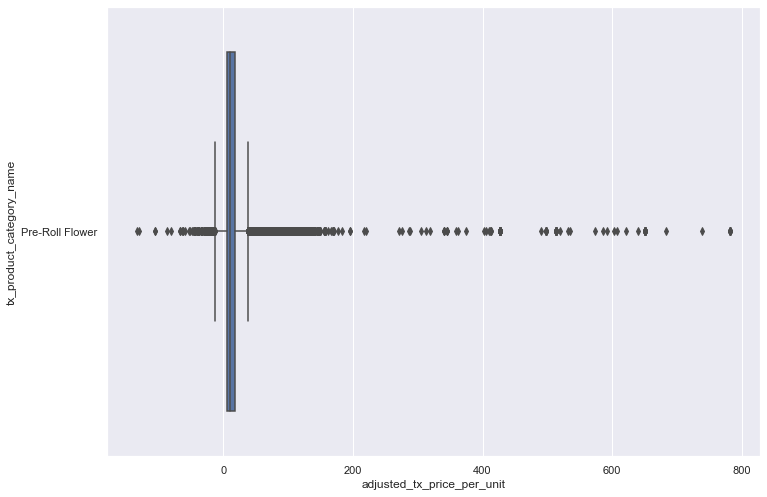

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 224496


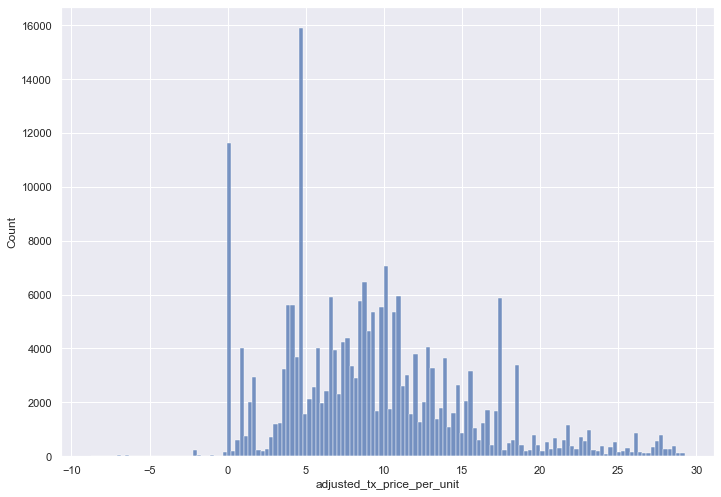

### Outputting summary table ### 	
count    224496.00
mean          9.44
std           6.05
min          -8.74
25%           4.60
50%           8.75
75%          12.90
max          29.26
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                 count   mean   std   min   25%    50%    75%    max
date_in_month                                                       
2020-01         5863.0   9.39  4.64  0.00  6.56   9.76  11.98  28.88
2020-02         4802.0   9.97  4.75  0.00  7.67  10.14  12.90  28.76
2020-03         5506.0   8.91  4.61  0.00  5.76   9.22  11.50  28.88
2020-04         5101.0   8.55  4.93  0.00  5.52   9.09  11.03  28.96
2020-05         5680.0   8.89  4.90  0.00  5.89   9.08  11.06  29.16
2020-06         5609.0   9.45  5.66  0.00  5.89   8.00  12.48  29.26
2020-07         7924.0  10.61  6.13  0.00  6.54  10.02  13.92  29.26
2020-08         9542.0  10.55  6.28  0.00  5.89   9.28  14.58  29.26
2020-09         8775

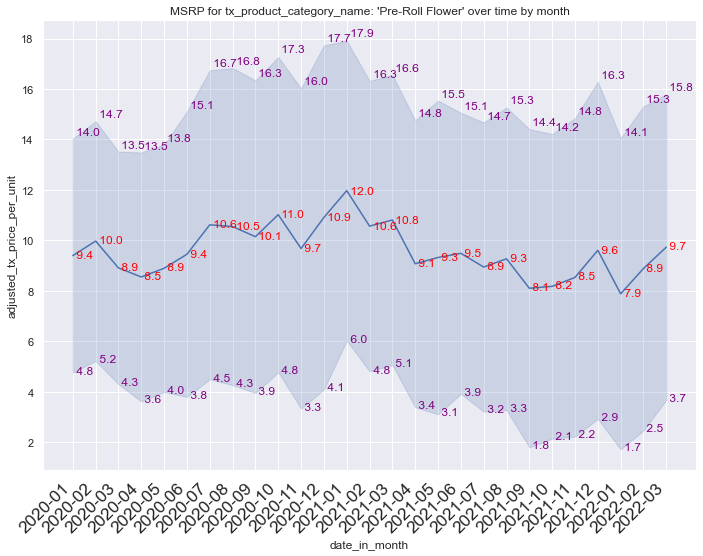

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         4.75                  14.03
2020-02                         5.22                  14.72
2020-03                         4.30                  13.52
2020-04                         3.62                  13.48
2020-05                         3.99                  13.79
2020-06                         3.79                  15.11
2020-07                         4.48                  16.74
2020-08                         4.27                  16.83
2020-09                         3.94                  16.34
2020-10                         4.77                  17.27
2020-11                         3.32                  16.02
2020-12                         4.09                  17.73
2021-01                         6.03                  17.91
2021-02                         4.80                  16.32
2021-03                         5.06    

In [42]:
mba.run_analysis('tx_product_category_name', 'Pre-Roll Flower', 'S')

In [48]:
mba.outlier_df

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category,letter_gram_measure_from_product_name,letter_litre_measure_from_product_name,delivery_type,manifest_number,created_date,received_datetime,shipment_transaction_type,shipper_facility_license_number,shipper_facility_name,recipient_facility_license_number,recipient_facility_name,shipment_type_name,shipment_transaction_type_1,package_id,package_label,type,source_package_labels,source_harvest_names,shipment_package_state,is_testing_sample,is_trade_sample,product_category_name,product_name,package_lab_results_status,shipper_wholesale_price,shipped_quantity,shipped_unit_of_measure,receiver_wholesale_price,received_quantity,received_unit_of_measure,receiver_wholesale_price_1,item_unit_weight,item_unit_weight_unit_of_measure_name
1286579,C10-0000169-LIC,0110862758,inactive,Consumer,2021-06-28 13:50:34.830000+00:00,2021-06,3.0,110.87,inactive,14462238,1A4060300007E93000048274,Autumn Brands_Pre-Roll 1 Gram(Cherry OG),Pre-Roll Flower,Each,1.0,-12.17,-12.17,2021-06,NaN,1.0,1 G,Gram,NaN,-12.170000,1.0,pre-roll flower,False,Autumn Brands_Pre-Roll 1 Gram(Cherry OG),Autumn Brands_Pre-Roll 1 Gram(Cherry OG),NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295382,C10-0000169-LIC,0111100460,inactive,Consumer,2021-06-25 22:19:47.550000+00:00,2021-06,7.0,93.82,inactive,14743209,1A4060300003C35000040694,Kanebes Indica Flower Headstash Pre-Roll 0.8g,Pre-Roll Flower,Each,1.0,-13.85,-13.85,2021-06,NaN,0.8,0.8g,NaN,NaN,-17.312500,0.8,pre-roll flower,False,Kanebes Indica Flower Headstash Pre-Roll 0.8g,Kanebes Indica Flower Headstash Pre-Roll 0.8g,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1197437,C10-0000169-LIC,0116180538,inactive,Consumer,2021-07-20 20:53:32.560000+00:00,2021-07,3.0,70.79,inactive,15905156,1A40603000072DE000057525,"Peach Peels .5g Pre-Roll, Ember Valley",Pre-Roll Flower,Each,1.0,-6.11,-6.11,2021-07,NaN,0.5,.5g,NaN,NaN,-12.220000,0.5,pre-roll flower,False,"Peach Peels .5g Pre-Roll, Ember Valley","Peach Peels .5g Pre-Roll, Ember Valley",NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190056,C10-0000169-LIC,0116607387,inactive,Consumer,2021-07-22 19:46:23.110000+00:00,2021-07,3.0,92.11,inactive,15905156,1A40603000072DE000057525,"Peach Peels .5g Pre-Roll, Ember Valley",Pre-Roll Flower,Each,1.0,-10.43,-10.43,2021-07,NaN,0.5,.5g,NaN,NaN,-20.860000,0.5,pre-roll flower,False,"Peach Peels .5g Pre-Roll, Ember Valley","Peach Peels .5g Pre-Roll, Ember Valley",NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206479,C10-0000169-LIC,0115597824,inactive,Consumer,2021-07-18 15:23:58.350000+00:00,2021-07,5.0,179.10,inactive,15588406,1A4060300006154000281785,Dime 0.5g PR 5 Pack v2 - Dream Queen,Pre-Roll Flower,Each,1.0,-5.48,-5.48,2021-07,NaN,0.5,0.5g,NaN,NaN,-10.960000,0.5,pre-roll flower,True,Dime 0.5g PR 5 Pack v2,Dime 0.5g PR 5 Pack v2 (Pre-Roll Flower),NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [36]:
mba.company_costs_df

,delivery_type,license_number,manifest_number,created_date,received_datetime,shipment_transaction_type,shipper_facility_license_number,shipper_facility_name,recipient_facility_license_number,recipient_facility_name,shipment_type_name,shipment_transaction_type_1,package_id,package_label,type,source_package_labels,source_harvest_names,shipment_package_state,is_testing_sample,is_trade_sample,product_category_name,product_name,package_lab_results_status,shipper_wholesale_price,shipped_quantity,shipped_unit_of_measure,receiver_wholesale_price,received_quantity,received_unit_of_measure,receiver_wholesale_price_1,item_unit_weight,item_unit_weight_unit_of_measure_name,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
111517,INCOMING_FROM_VENDOR,C10-0000005-LIC,0000225335,2020-01-01,2020-01-02 20:30:56+00:00,Wholesale,C11-0000014-LIC,"CALIFORNIA STATE DISTRIBUTION, LLC",C10-0000005-LIC,"DPC SF, LLC",Wholesale Manifest,Wholesale,1769301,1A406030000A22C000001337,transfer,1A406030000546F000000205,,Accepted,False,False,Edible (weight - each),WYLD - Huckleberry Gummies - 10 Pack,passed,0.01,1.0,Each,0.01,1.0,Each,0.01,40.0,Grams,0.010000,2020-01,NaN,NaN,NaN,NaN,NaN,0.010000,1.000,edible,True,WYLD,WYLD (Edible (weight - each))
110006,INCOMING_FROM_VENDOR,C10-0000064-LIC,0000272275,2020-01-23,2020-01-29 00:46:15+00:00,Wholesale,C11-0000136-LIC,"PACIFIC RESERVE NURSERY, LLC",C10-0000064-LIC,"HUENEME PATIENT CONSUMER COLLECTIVE, LLC.",Wholesale Manifest,Wholesale,2220925,1A40603000064A2000004949,transfer_incoming,1A40603000064A2000003998,HB_PACSUN_2841_110419,Accepted,False,False,Flower,PACIFIC SUNSET 3.5g JAR,passed,368.00,112.0,Grams,368.00,112.0,Grams,368.00,NaN,None,3.285714,2020-01,NaN,NaN,3.5g,NaN,NaN,3.285714,1.000,flower,False,PACIFIC SUNSET 3.5g JAR,PACIFIC SUNSET 3.5g JAR
110007,INCOMING_FROM_VENDOR,C10-0000005-LIC,0000272336,2020-01-23,2020-01-23 22:09:15+00:00,Wholesale,C11-0000937-LIC,"KIND HOUSE, INC.",C10-0000005-LIC,"DPC SF, LLC",Wholesale Manifest,Wholesale,2225388,1A406030000601A000039134,transfer,1A406030000601A000029343,,Accepted,False,False,Edible (weight - each),Satori CBD Almonds in Dark Chocolate (14mg THC...,failed,80.00,10.0,Each,80.00,10.0,Each,80.00,68.0,Grams,8.000000,2020-01,NaN,0.014,14mg,NaN,NaN,571.428571,0.014,edible,False,Satori CBD Almonds in Dark Chocolate (14mg THC...,Satori CBD Almonds in Dark Chocolate (14mg THC...
110008,INCOMING_FROM_VENDOR,C10-0000064-LIC,0000274823,2020-01-23,2020-01-25 01:56:13+00:00,Wholesale,C11-0000975-LIC,HERBL INC,C10-0000064-LIC,"HUENEME PATIENT CONSUMER COLLECTIVE, LLC.",Wholesale Manifest,Wholesale,2237208,1A4060300006D0A000066532,transfer_incoming,1A4060300006D0A000060742,,Accepted,False,False,Vape Cartridge (volume - each),Raw Garden Cartridge 0.5g Indica Skydoggie (1...,failed,450.00,30.0,Each,450.00,30.0,Each,450.00,NaN,None,15.000000,2020-01,11684,0.500,0.5g,NaN,NaN,30.000000,0.500,vape cartridge,False,Raw Garden Cartridge 0.5g Indica Skydoggie (1...,Raw Garden Cartridge 0.5g Indica Skydoggie (1...
110009,INCOMING_FROM_VENDOR,C10-0000169-LIC,0000275105,2020-01-23,2020-01-24 18:17:16+00:00,Wholesale,C11-0000701-LIC,MONEX PLACE WELLNESS INC,C10-0000169-LIC,"GREEN ROSE GREEN LEAF CARE, INC.",Wholesale Manifest,Wholesale,2216447,1A4060300004B03000010429,transfer,1A4060300004E2E000032895,,Accepted,False,False,Pre-Roll Leaf,Caliva - Pre-roll - 0.6g - House Doobie - Hybrid,passed,120.00,48.0,Each,120.00,48.0,Each,120.00,0.6,Grams,2.500000,2020-01,NaN,0.600,0.6g,NaN,NaN,4.166667,0.600,pre-roll leaf,True,Caliva,Caliva (Pre-Roll Leaf)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,INCOMIN

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 16.57839635423082 %


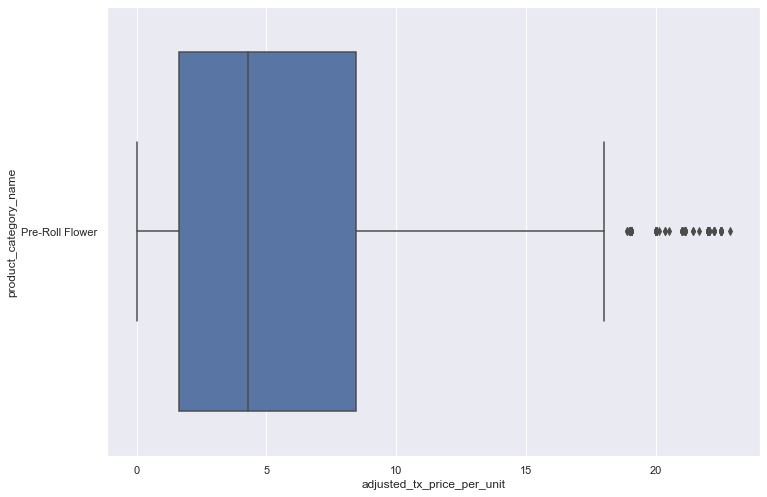

### Checking histogram distribution of MSRP for given product_category_name ### 	
Total number of transactions for Pre-Roll Flower in product_category_name : 6773


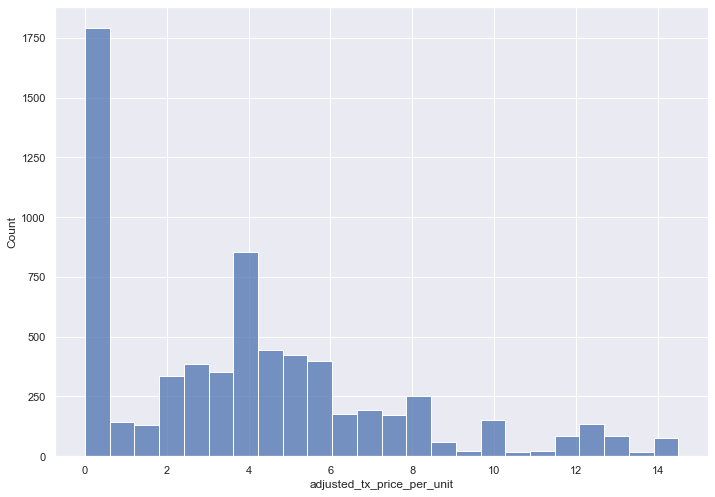

### Outputting summary table ### 	
count    6728.00
mean        3.97
std         3.54
min         0.00
25%         0.06
50%         3.87
75%         6.00
max        14.50
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean   std  min   25%   50%   75%    max
date_in_month                                                 
2020-01        147.0  3.85  2.85  0.0  1.50  3.50  5.50  12.50
2020-02        157.0  4.14  3.02  0.0  1.88  4.00  5.71  12.50
2020-03        184.0  3.93  3.04  0.0  1.81  4.00  5.71  12.50
2020-04        150.0  3.23  2.91  0.0  1.00  2.50  5.00  12.50
2020-05        147.0  2.90  3.21  0.0  0.01  2.00  5.00  14.29
2020-06        220.0  2.92  2.86  0.0  0.02  2.00  5.00  14.00
2020-07        348.0  3.97  3.70  0.0  0.01  3.75  6.57  14.00
2020-08        325.0  4.11  3.67  0.0  1.00  3.50  6.00  14.29
2020-09        222.0  4.66  3.86  0.0  1.50  4.38  6.88  13.97
2020-10        168.0  4.10  3.91 

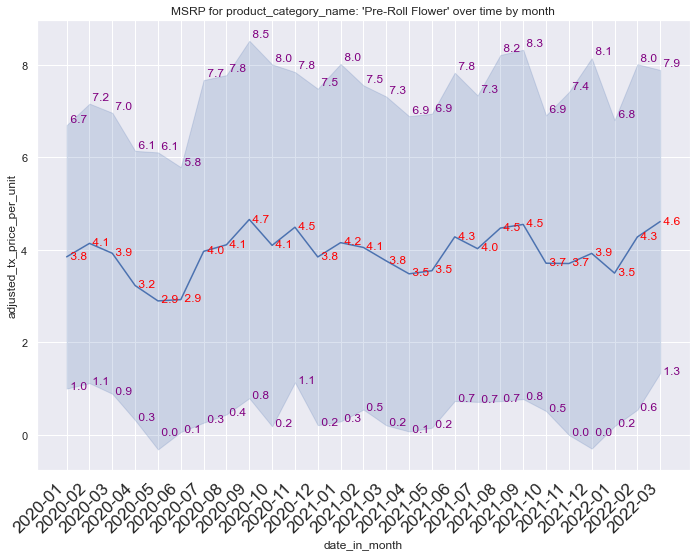

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         1.00                   6.70
2020-02                         1.12                   7.16
2020-03                         0.89                   6.97
2020-04                         0.32                   6.14
2020-05                         0.00                   6.11
2020-06                         0.06                   5.78
2020-07                         0.27                   7.67
2020-08                         0.44                   7.78
2020-09                         0.80                   8.52
2020-10                         0.19                   8.01
2020-11                         1.14                   7.84
2020-12                         0.21                   7.49
2021-01                         0.30                   8.02
2021-02                         0.55                   7.55
2021-03                         0.21    

In [66]:
mba.run_analysis('product_category_name', 'Pre-Roll Flower', 'C')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.08864300477514075 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.131494547787043 %


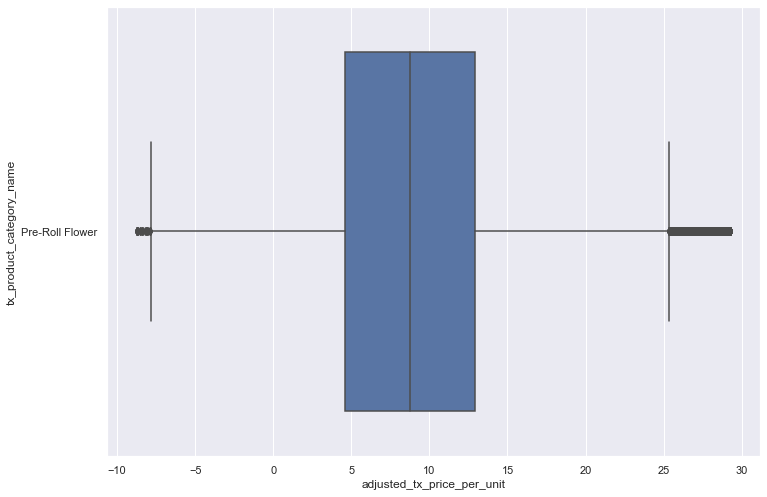

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 212777


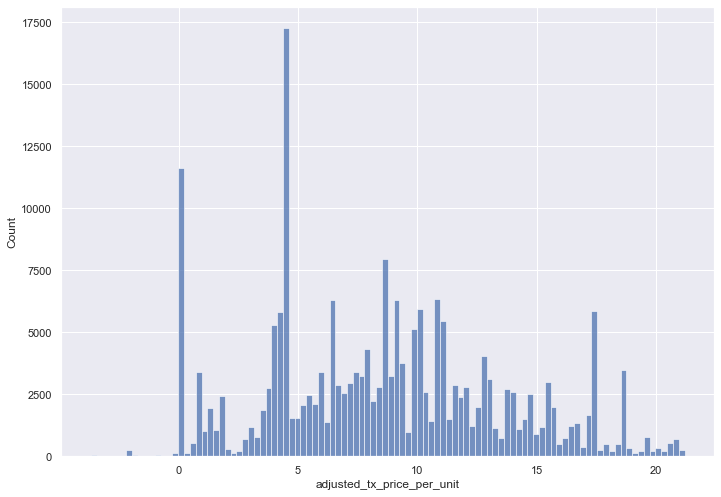

### Outputting summary table ### 	
count    212777.00
mean          8.63
std           4.99
min          -3.68
25%           4.60
50%           8.53
75%          11.90
max          21.20
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                 count   mean   std   min   25%    50%    75%    max
date_in_month                                                       
2020-01         5796.0   9.21  4.34  0.00  6.49   9.76  11.93  20.92
2020-02         4723.0   9.73  4.39  0.00  7.67  10.14  12.48  20.97
2020-03         5445.0   8.73  4.31  0.00  5.52   9.20  11.50  20.69
2020-04         5007.0   8.26  4.50  0.00  5.41   9.08  10.85  20.97
2020-05         5570.0   8.60  4.48  0.00  5.89   9.06  11.03  20.82
2020-06         5358.0   8.75  4.73  0.00  5.89   7.72  11.23  20.98
2020-07         7390.0   9.65  5.13  0.00  6.54   9.89  13.10  21.11
2020-08         8951.0   9.59  5.19  0.00  5.89   9.06  13.75  21.11
2020-09         8298

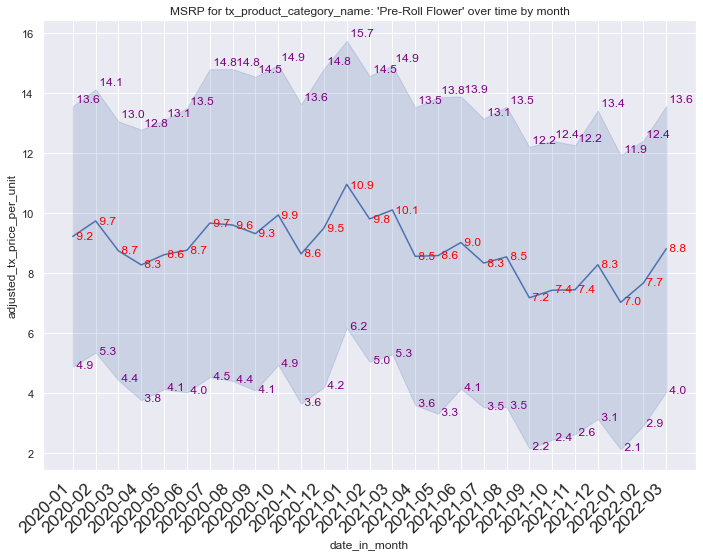

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         4.87                  13.55
2020-02                         5.34                  14.12
2020-03                         4.42                  13.04
2020-04                         3.76                  12.76
2020-05                         4.12                  13.08
2020-06                         4.02                  13.48
2020-07                         4.52                  14.78
2020-08                         4.40                  14.78
2020-09                         4.07                  14.53
2020-10                         4.94                  14.92
2020-11                         3.64                  13.62
2020-12                         4.19                  14.79
2021-01                         6.17                  15.73
2021-02                         5.03                  14.55
2021-03                         5.28    

In [55]:
mba.run_analysis('tx_product_category_name', 'Pre-Roll Flower', 'S')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.10710516371975451 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.773750114010971 %


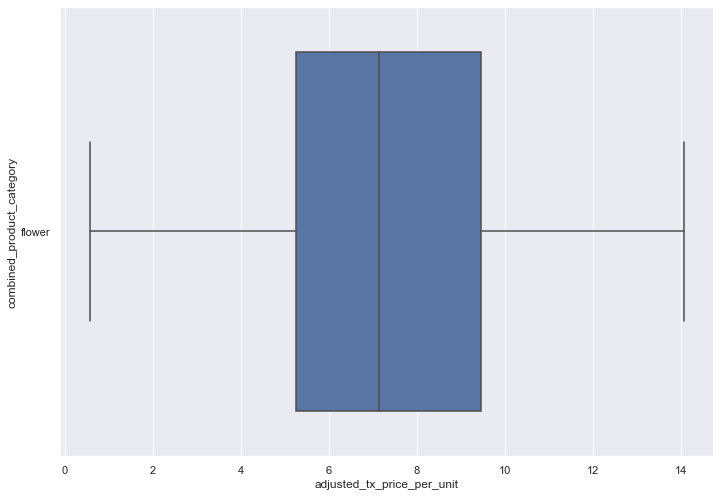

### Checking histogram distribution of MSRP for given combined_product_category ### 	
Total number of transactions for flower in combined_product_category : 753035


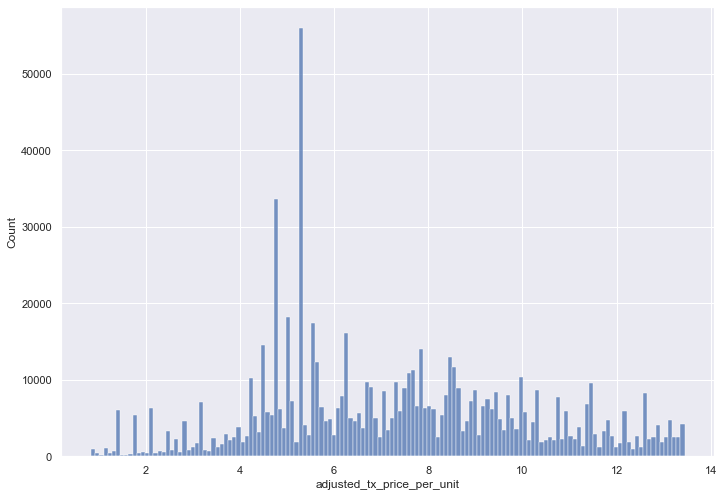

### Outputting summary table ### 	
count    753035.00
mean          7.29
std           2.80
min           0.84
25%           5.25
50%           7.09
75%           9.29
max          13.45
Name: flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                 count  mean   std   min   25%   50%    75%    max
date_in_month                                                     
2020-01        18814.0  7.56  2.55  0.87  5.58  7.69   8.99  13.45
2020-02        19568.0  7.52  2.48  0.92  5.32  7.63   9.19  13.41
2020-03        22637.0  7.64  2.50  0.86  5.32  7.66   9.46  13.45
2020-04        22550.0  7.64  2.53  0.92  5.32  7.63   9.46  13.45
2020-05        25991.0  7.62  2.51  0.90  5.32  7.47   9.46  13.45
2020-06        25309.0  7.71  2.49  0.92  5.32  7.64   9.46  13.45
2020-07        28565.0  7.96  2.68  0.84  5.32  7.88  10.04  13.44
2020-08        27830.0  7.93  2.70  0.84  5.32  7.74  10.09  13.44
2020-09        25084.0  7.79  2.70  0.86  5.32  7

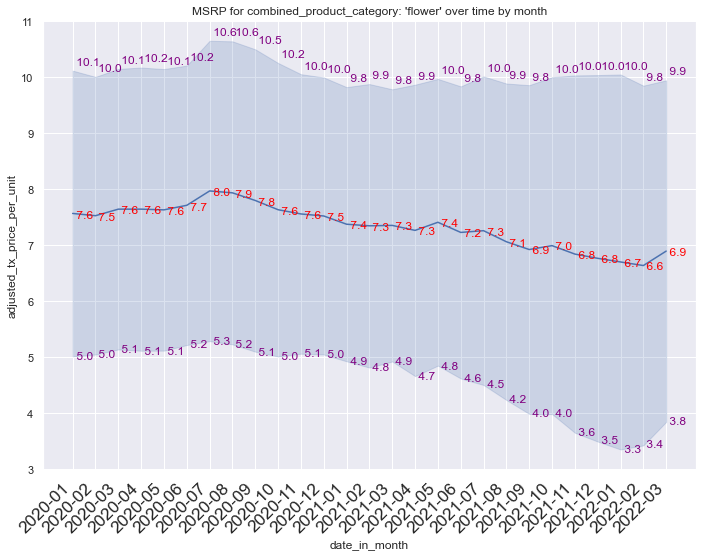

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         5.01                  10.11
2020-02                         5.04                  10.00
2020-03                         5.14                  10.14
2020-04                         5.11                  10.17
2020-05                         5.11                  10.13
2020-06                         5.22                  10.20
2020-07                         5.28                  10.64
2020-08                         5.23                  10.63
2020-09                         5.09                  10.49
2020-10                         5.01                  10.25
2020-11                         5.06                  10.04
2020-12                         5.04                   9.98
2021-01                         4.92                   9.82
2021-02                         4.81                   9.87
2021-03                         4.92    

In [53]:
mba.run_analysis('combined_product_category', 'flower', 'S')

In [56]:
combined_median_price = mba.company_sales_df[mba.company_sales_df.combined_product_category == 'flower'].adjusted_tx_price_per_unit.median()

eighth_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged eighth - each)'].tx_price_per_unit.median()
quarter_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged quarter - each)'].tx_price_per_unit.median()
half_once_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged half ounce - each)'].tx_price_per_unit.median()
once_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged ounce - each)'].tx_price_per_unit.median()

In [57]:
combined_median_price_flower_non_labeled = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower'].adjusted_tx_price_per_unit.median()


In [58]:
combined_median_price

7.094285714285713

In [59]:
combined_median_price_flower_non_labeled

6.725714285714285

In [60]:
eighth_median_price / 3.5

7.565714285714286

In [61]:
quarter_median_price / 7

5.68

In [62]:
half_once_median_price / 14

3.6550000000000002

In [63]:
once_median_price / 28

2.065

In [216]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name.str.contains('Flower', case = False)].groupby('tx_product_category_name').count()

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
tx_product_category_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Flower,176695,176695,176695,176695,176695,176695,176695,176695,176695,176695,176695,176695,176695,176695,176695,176695,176695,31247,0,127482,1703,2591,176695,176695,176695,176695,176695,176695
Flower (packaged - each),9001,9001,9001,9001,9001,9001,9001,9001,9001,9001,9001,9001,9001,9001,9001,9001,9001,350,5775,4762,1008,82,9001,9001,9001,9001,9001,9001
Flower (packaged eighth - each),579146,579146,579146,579146,579146,579146,579146,579146,579146,579146,579146,579146,579146,579146,579146,579146,579146,100404,380719,345817,2754,34943,579146,579146,579146,579146,579146,579146
Flower (packaged gram - each),22559,22559,22559,22559,22559,22559,22559,22559,22559,22559,22559,22559,22559,22559,22559,22559,22559,6189,22218,19842,4395,192,22559,22559,22559,22559,22559,22559
Flower (packaged half ounce - each),34868,34868,34868,34868,34868,34868,34868,34868,34868,34868,34868,34868,34868,34868,34868,34868,34868,3743,20765,14333,0,6655,34868,34868,34868,34868,34868,34868
Flower (packaged ounce - each),17797,17797,17797,17797,17797,17797,17797,17797,17797,17797,17797,17797,17797,17797,17797,17797,17797,3065,10055,7005,0,3158,17797,17797,17797,17797,17797,17797
Flower (packaged quarter - each),29688,29688,29688,29688,29688,29688,29688,29688,29688,29688,29688,29688,29688,29688,29688,29688,29688,6702,26132,22438,166,3694,29688,29688,29688,29688,29688,29688
Pre-Roll Flower,223310,223310,223310,223310,223310,223310,223310,223310,223310,223310,223310,223310,223310,223310,223310,223310,223310,35572,181991,181987,10007,226,223310,223310,223310,223310,223310,223310


In [219]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower']

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
3062010,C10-0000064-LIC,0007541945,inactive,Consumer,2020-01-22 16:10:17+00:00,2020-01,2,42.20,inactive,2051783,1A40603000038C5000007638,Wedding Cake 1/8,Flower,Grams,3.5,25.59,7.311429,2020-01,NaN,NaN,NaN,NaN,NaN,7.311429,1.0,flower,False,Wedding Cake 1/8,Wedding Cake 1/8
3062008,C10-0000064-LIC,0007541945,inactive,Consumer,2020-01-22 16:10:17+00:00,2020-01,2,42.20,inactive,2051213,1A4060300003FB1000025621,Littles 3.5g Flower - Sativa,Flower,Grams,3.5,16.61,4.745714,2020-01,NaN,NaN,3.5g,NaN,NaN,4.745714,1.0,flower,True,Littles 3.5g Flower,Littles 3.5g Flower (Flower)
3061997,C10-0000064-LIC,0007541956,inactive,Consumer,2020-01-22 16:13:24+00:00,2020-01,2,40.46,inactive,2031026,1A4060300003D59000001877,Rich & Ruthless - CPT Cookies (1 GM Flower) (#...,Flower,Grams,1.0,7.36,7.360000,2020-01,NaN,NaN,1 G,NaN,NaN,7.360000,1.0,flower,True,Rich & Ruthless,Rich & Ruthless (Flower)
3061993,C10-0000064-LIC,0007541959,inactive,Consumer,2020-01-22 16:13:30+00:00,2020-01,8,255.54,inactive,1995485,1A4060300005B14000030646,Cresco MAC Flower Prepackaged 1/8th (32pk),Flower,Grams,3.5,38.48,10.994286,2020-01,NaN,NaN,NaN,NaN,NaN,10.994286,1.0,flower,False,Cresco MAC Flower Prepackaged 1/8th (32pk),Cresco MAC Flower Prepackaged 1/8th (32pk)
3061986,C10-0000064-LIC,0007541959,inactive,Consumer,2020-01-22 16:13:30+00:00,2020-01,8,255.54,inactive,1990666,1A4060300007406000007362,Outdoor - Connected - Eighth Case (32) - Gushers,Flower,Grams,3.5,24.21,6.917143,2020-01,NaN,NaN,NaN,NaN,NaN,6.917143,1.0,flower,True,Outdoor,Outdoor (Flower)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752476,C10-0000596-LIC,0136483366,active,Patient,2021-10-15 15:58:02.440000+00:00,2021-10,2,40.01,active,9058914,1A4060300003D59000013358,Rich & Ruthless - CPT Glue (28 GM Flower - SMS...,Flower,Grams,28.0,40.00,1.428571,2021-10,32568,NaN,28 G,NaN,NaN,1.428571,1.0,flower,True,Rich & Ruthless,Rich & Ruthless (Flower)
780010,C10-0000596-LIC,0135316771,active,Consumer,2021-10-10 15:09:00.540000+00:00,2021-10,1,40.00,active,9058914,1A4060300003D59000013358,Rich & Ruthless - CPT Glue (28 GM Flower - SMS...,Flower,Grams,28.0,40.00,1.428571,2021-10,32568,NaN,28 G,NaN,NaN,1.428571,1.0,flower,True,Rich & Ruthless,Rich & Ruthless (Flower)
780182,C10-0000596-LIC,0135309797,active,Consumer,2021-10-10 14:39:12.490000+00:00,2021-10,1,18.00,active,5751563,1A4060300003D59000009119,Cali Flwr Farm - Cali Gas (3.5 GM Flower) (#15...,Flower,Grams,3.5,18.00,5.142857,2021-10,NaN,NaN,3.5 G,NaN,NaN,5.142857,1.0,flower,True,Cali Flwr Farm,Cali Flwr Farm (Flower)
780488,C10-0000596-LIC,0135295567,active,Consumer,2021-10-10 13:46:27.110000+00:00,2021-10,1,30.00,active,5751563,1A4060300003D59000009119,Cali Flwr Farm - Cali Gas (3.5 GM Flower) (#15...,Flower,Grams,7.0,30.00,4.285714,2021-10,NaN,NaN,3.5 G,NaN,NaN,4.285714,1.0,flower,True,Cali Flwr Farm,Cali Flwr Farm (Flower)


In [218]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Pre-Roll Flower']

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
3062003,C10-0000005-LIC,0007542363,active,Consumer,2020-01-22 16:11:47+00:00,2020-01,4,26.08,active,1985982,1A4060300006D0A000053908,3Bros Preroll 1.0g Hybrid Peanut Butter Breat...,Pre-Roll Flower,Each,1.0,7.82,7.82,2020-01,12016,1.0,1.0g,NaN,NaN,7.820000,1.0,pre-roll flower,False,3Bros Preroll 1.0g Hybrid Peanut Butter Breat...,3Bros Preroll 1.0g Hybrid Peanut Butter Breat...
3062002,C10-0000005-LIC,0007542363,active,Consumer,2020-01-22 16:11:47+00:00,2020-01,4,26.08,active,1579826,1A40603000044D3000008494,GF Indica 1g Pre-Roll: GMO,Pre-Roll Flower,Each,1.0,7.30,7.30,2020-01,NaN,1.0,1g,NaN,NaN,7.300000,1.0,pre-roll flower,False,GF Indica 1g Pre-Roll: GMO,GF Indica 1g Pre-Roll: GMO
3062000,C10-0000005-LIC,0007542363,active,Consumer,2020-01-22 16:11:47+00:00,2020-01,4,26.08,active,1791193,1A4060300004F4E000016623,"S3819FG-1: Stone Single Preroll, Tangie, 1g Ad...",Pre-Roll Flower,Each,1.0,5.22,5.22,2020-01,NaN,1.0,1g,NaN,NaN,5.220000,1.0,pre-roll flower,True,S3819FG,S3819FG (Pre-Roll Flower)
3062046,C10-0000169-LIC,0007538169,inactive,Consumer,2020-01-22 16:02:22+00:00,2020-01,3,51.23,inactive,2109036,1A4060300004B03000010667,Gold Coast - PreRoll - 0.8g - Hybrid - Blue Co...,Pre-Roll Flower,Each,1.0,5.19,5.19,2020-01,NaN,0.8,0.8g,NaN,NaN,6.487500,0.8,pre-roll flower,True,Gold Coast,Gold Coast (Pre-Roll Flower)
3062022,C10-0000005-LIC,0007538302,active,Consumer,2020-01-22 16:09:44+00:00,2020-01,3,75.85,active,1579830,1A40603000044D3000008498,Calm 101 1g Pre-Roll,Pre-Roll Flower,Each,2.0,27.72,13.86,2020-01,NaN,1.0,1g,NaN,NaN,13.860000,1.0,pre-roll flower,False,Calm 101 1g Pre-Roll,Calm 101 1g Pre-Roll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56833,C10-0000169-LIC,0169783350,active,Consumer,2022-03-06 14:39:39.210000+00:00,2022-03,4,76.94,active,22785346,1A406030000A803000002861,Herbarium Gelato 1G Pre-Roll,Pre-Roll Flower,Each,2.0,22.48,11.24,2022-03,NaN,1.0,1G,NaN,NaN,11.240000,1.0,pre-roll flower,False,Herbarium Gelato 1G Pre-Roll,Herbarium Gelato 1G Pre-Roll
56835,C10-0000169-LIC,0169783350,active,Consumer,2022-03-06 14:39:39.210000+00:00,2022-03,4,76.94,active,19203557,1A406030000A429000188954,STIIIZY - LIIIT - Ice Cream Cake Pre-roll - 0....,Pre-Roll Flower,Each,1.0,-0.99,-0.99,2022-03,NaN,0.5,0.5g,NaN,NaN,-1.980000,0.5,pre-roll flower,True,STIIIZY,STIIIZY (Pre-Roll Flower)
56856,C10-0000786-LIC,0169782455,active,Consumer,2022-03-06 14:36:17+00:00,2022-03,4,61.02,active,22720059,1A4060300006D0A000654192,HENRY'S ORIGINAL Preroll 1.0g Hybrid GG4 (28ct),Pre-Roll Flower,Each,1.0,11.17,11.17,2022-03,18105,1.0,1.0g,NaN,NaN,11.170000,1.0,pre-roll flower,False,HENRY'S ORIGINAL Preroll 1.0g Hybrid GG4 (28ct),HENRY'S ORIGINAL Preroll 1.0g Hybrid GG4 (28ct)
56858,C10-0000786-LIC,0169782455,active,Consumer,2022-03-06 14:36:17+00:00,2022-03,4,61.02,active,22720054,1A4060300006D0A000654187,HENRY'S ORIGINAL Preroll 1.0g Indica Birthday...,Pre-Roll Flower,Each,1.0,11.17,11.17,2022-03,17683,1.0,1.0g,NaN,NaN,11.170000,1.0,pre-roll flower,False,HENRY'S ORIGINAL Preroll 1.0g Indica Birthday...,HENRY'S ORIGINAL Preroll 1.0g Indica Birthday...


### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.19255413095008864 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.565133094743272 %


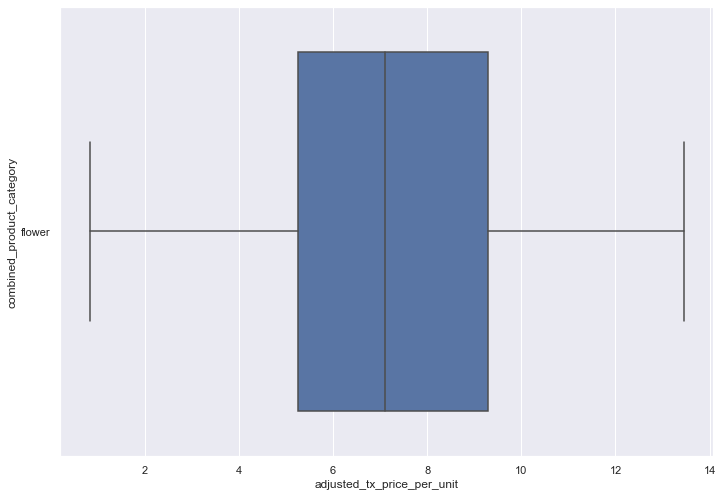

### Checking histogram distribution of MSRP for given combined_product_category ### 	
Total number of transactions for flower in combined_product_category : 739799


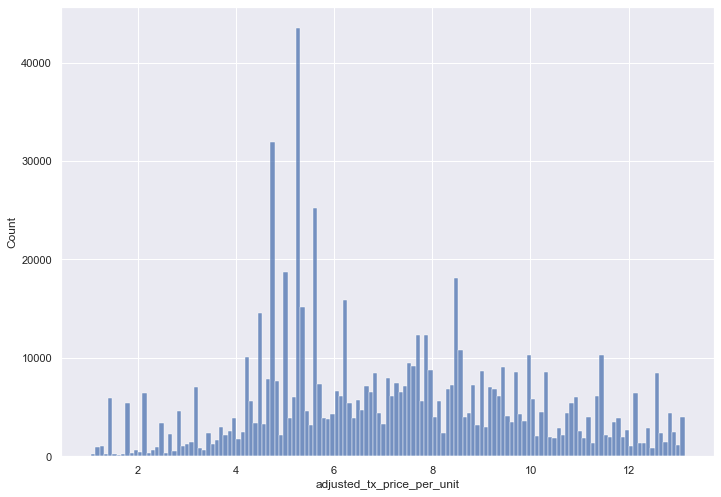

### Outputting summary table ### 	
count    739799.00
mean          7.20
std           2.71
min           1.05
25%           5.25
50%           6.99
75%           9.19
max          13.14
Name: flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                 count  mean   std   min   25%   50%    75%    max
date_in_month                                                     
2020-01        18299.0  7.40  2.39  1.11  5.58  7.61   8.76  13.14
2020-02        19073.0  7.37  2.33  1.10  5.32  7.62   8.87  13.13
2020-03        22096.0  7.52  2.37  1.38  5.32  7.62   9.19  13.14
2020-04        21918.0  7.50  2.37  1.09  5.32  7.53   9.19  13.14
2020-05        25399.0  7.51  2.38  1.53  5.32  7.44   9.20  13.14
2020-06        24976.0  7.64  2.42  1.10  5.32  7.63   9.46  13.14
2020-07        28233.0  7.94  2.62  1.55  5.32  7.88  10.01  13.12
2020-08        27543.0  7.90  2.65  1.06  5.32  7.74   9.99  13.14
2020-09        24809.0  7.75  2.64  1.08  5.32  7

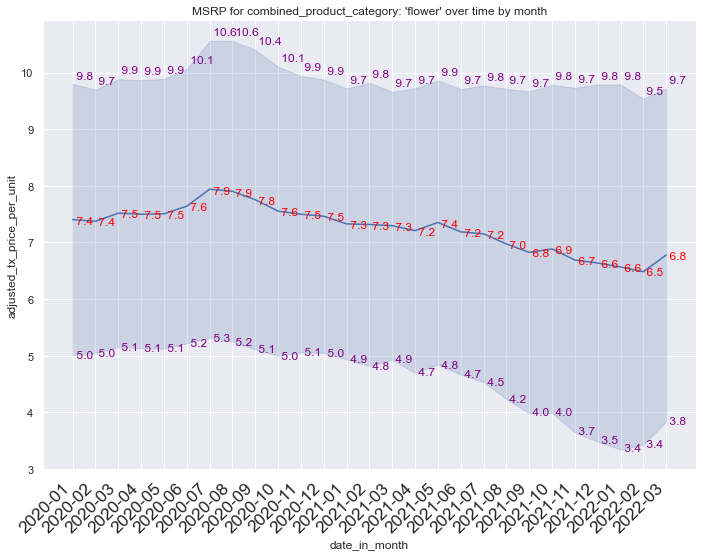

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         5.01                   9.79
2020-02                         5.04                   9.70
2020-03                         5.15                   9.89
2020-04                         5.13                   9.87
2020-05                         5.13                   9.89
2020-06                         5.22                  10.06
2020-07                         5.32                  10.56
2020-08                         5.25                  10.55
2020-09                         5.11                  10.39
2020-10                         5.00                  10.10
2020-11                         5.06                   9.94
2020-12                         5.05                   9.87
2021-01                         4.94                   9.72
2021-02                         4.82                   9.82
2021-03                         4.94    

In [67]:
mba.output_time_series_metadata('combined_product_category', 'flower', 'S')